## 敘述統計 - 以語系為主
- 前置作業: 執行data_preprocessing.ipynb 檔案

In [2]:
# 敘述統計分析(不包含評論內容)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 載入中文字體
import matplotlib.font_manager as fm

# 設定字體（微軟正黑）
font_path = "C:/Windows/Fonts/msjh.ttc"  # 字體路徑
font_prop = fm.FontProperties(fname=font_path)

plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings("ignore")

In [3]:
# 基礎評分分析
new_basic_info_rating_838 = pd.read_csv('../data/838-new_basic_info_rating.csv')
new_basic_info_rating_838.head()

,location_id,gmap_location,attraction_type,address,score,date,language,snownlp_scores_0-100
0,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,3,2025-02-09,zh-Hant,28.0
1,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,1,2024-12-06,zh-Hant,0.0
2,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,5,2024-09-21,zh-Hant,0.0
3,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,5,2024-09-20,zh-Hant,33.0
4,0x346885034084ae89:0x59a8b1eac5731c29,白楊步道水簾洞,自然景觀與戶外,花蓮縣,5,2024-09-15,zh-Hant,16.0


In [4]:
# 評論數篩選器
rating_counts = new_basic_info_rating_838.groupby('gmap_location')['gmap_location'].transform('count')
new_basic_info_rating_838 = new_basic_info_rating_838[rating_counts > 100]
print(new_basic_info_rating_838['gmap_location'].unique().size)

776


In [5]:
# 列出前8大國籍
nationality_counts = new_basic_info_rating_838.groupby('language')['score'].count().sort_values(ascending=False)
print(nationality_counts[:8])

# 取出前n名的 index
rank_n = nationality_counts[:8].index
rank_n.values

language
zh-Hant    2469301
en          151221
ko           45818
ja           36353
zh           25614
id            7822
vi            7414
th            6470
Name: score, dtype: int64


array(['zh-Hant', 'en', 'ko', 'ja', 'zh', 'id', 'vi', 'th'], dtype=object)

In [6]:
# 去除簡體中文
rank_n = rank_n.drop("zh")
rank_n.values

array(['zh-Hant', 'en', 'ko', 'ja', 'id', 'vi', 'th'], dtype=object)

In [7]:
# 國籍數篩選器
nationality_count_filter = new_basic_info_rating_838['language'].isin(rank_n)
new_basic_info_rating_838 = new_basic_info_rating_838[nationality_count_filter]
print(nationality_count_filter[nationality_count_filter == True].count())

2724399


In [8]:
# 語言標籤轉國籍標籤
nationality_translation = {
    "zh-Hant": "繁體中文",
    "en": "英文",
    "ko": "韓文",
    "ja": "日文",
    "id": "東南亞",
    "vi": "東南亞",
    "th": "東南亞",
}

In [9]:
# 直接修改語言欄位的值
new_basic_info_rating_838['language'] = new_basic_info_rating_838['language'].replace(nationality_translation)

In [10]:
nationality_counts = new_basic_info_rating_838.groupby('language')['score'].count().sort_values(ascending=False)
nationality_counts

language
繁體中文    2469301
英文       151221
韓文        45818
日文        36353
東南亞       21706
Name: score, dtype: int64

## 語系單維度分析

### 前5大語系平均評分

language
東南亞     4.533539
英文      4.453793
繁體中文    4.351754
日文      4.269029
韓文      4.152211
Name: score, dtype: float64


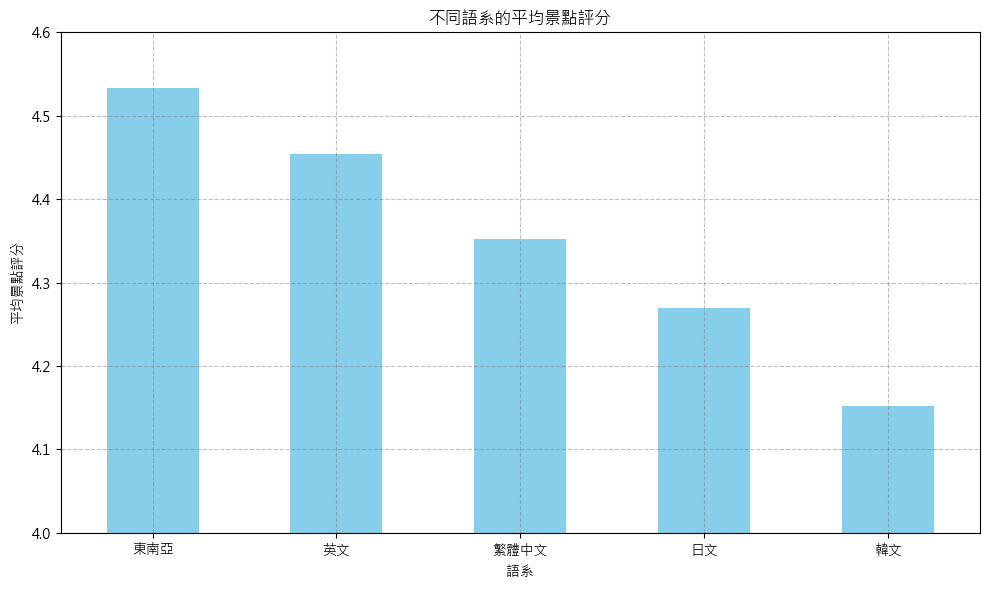

In [11]:
# 語系平均評分
nationality_groups = new_basic_info_rating_838.groupby('language')['score'].mean().sort_values(ascending=False)
print(nationality_groups)

# 畫圖
ax = nationality_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('語系')
plt.ylabel('平均景點評分')
plt.title('不同語系的平均景點評分')

plt.xticks(rotation=0)
plt.yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(4,4.6)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 前5大語系平均情感分數

language
東南亞     60.894131
繁體中文    58.745174
英文      57.270346
日文      47.884549
韓文      47.435768
Name: snownlp_scores_0-100, dtype: float64


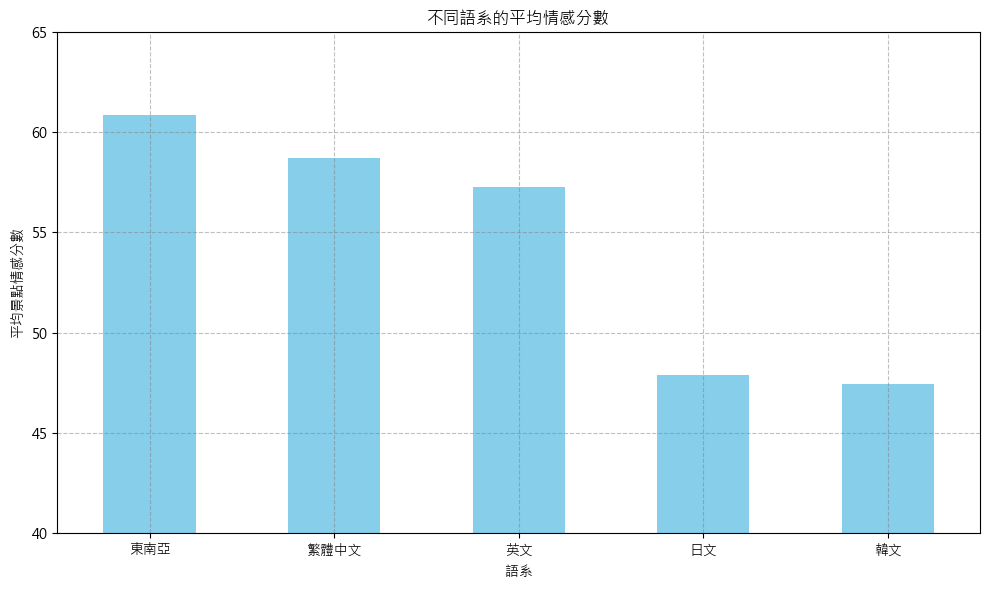

In [13]:
# 語系平均情感分數
nlp_nationality_groups = new_basic_info_rating_838.groupby('language')['snownlp_scores_0-100'].mean().sort_values(ascending=False)
print(nlp_nationality_groups)

# 畫圖
ax = nlp_nationality_groups.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('語系')
plt.ylabel('平均景點情感分數')
plt.title('不同語系的平均情感分數')

plt.xticks(rotation=0)
plt.grid(linestyle='--',color='gray', alpha=0.5)
plt.ylim(40, 65)

# 自動調整文字間距
plt.tight_layout()

plt.show()

### 語系評分與情感分數並列

          avg_score  average_nlp
language                        
日文         4.269029    47.884549
東南亞        4.533539    60.894131
繁體中文       4.351754    58.745174
英文         4.453793    57.270346
韓文         4.152211    47.435768


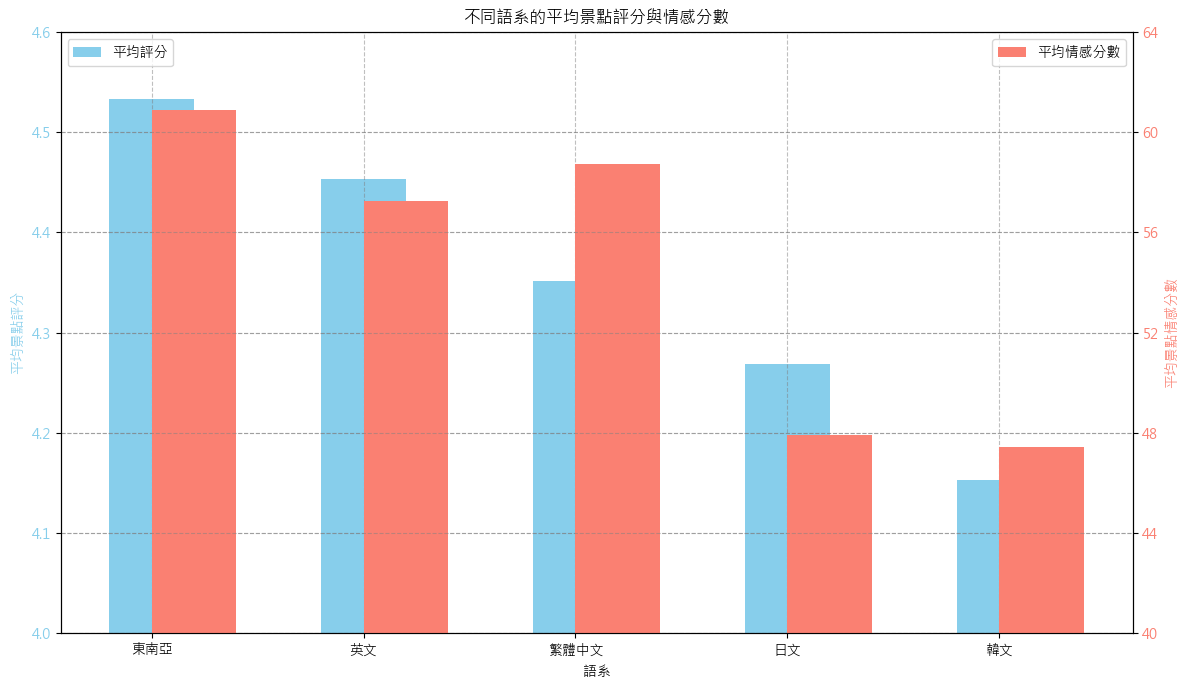

In [18]:
# 語系評分與情感分數並列

nationality_groups_all = pd.DataFrame({'avg_score':nationality_groups, 'average_nlp':nlp_nationality_groups})
print(nationality_groups_all)

# 畫圖
fig, ax1 = plt.subplots(figsize=(12, 7))  # 調整圖表大小

# 繪製平均評分長條圖 (左 Y 軸)
color = 'skyblue'
ax1.set_xlabel('語系')
ax1.set_ylabel('平均景點評分', color=color)
ax1.bar(nationality_groups.index, nationality_groups.values, label="平均評分", color=color, width=0.4, align='center')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(4, 4.6)
ax1.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6])

# 創建第二個 Y 軸 (右 Y 軸)
ax2 = ax1.twinx()

# 繪製平均情感分數長條圖 (右 Y 軸)
color = 'salmon'
ax2.set_ylabel('平均景點情感分數', color=color)
ax2.bar(nlp_nationality_groups.index, nlp_nationality_groups.values, label="平均情感分數", color=color, width=0.4, align='edge')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(40, 64)
ax2.set_yticks([40, 44, 48, 52, 56, 60, 64])


# 旋轉縣市名稱標籤 使其易於閱讀
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--',color='gray', alpha=0.5)

# 設定標題
plt.title('不同語系的平均景點評分與情感分數')

# 設定 X 軸刻度
plt.xticks(rotation=0)

# 加上格線
ax1.grid(linestyle='--', color='gray', alpha=0.5)

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# 自動調整文字間距
plt.tight_layout()

# 顯示圖表
plt.show()

## 語系與縣市評分

### 語系縣市平均評分

In [13]:
# 語系縣市平均評分
top_city_per_nation = new_basic_info_rating_838.groupby(["language", "address"])["score"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
top_city_per_nation

,language,address,score
0,日文,連江縣,4.603448
1,日文,澎湖縣,4.573333
2,日文,雲林縣,4.569444
3,日文,金門縣,4.486239
4,日文,屏東縣,4.467164
...,...,...,...
105,韓文,澎湖縣,4.038462
106,韓文,台南市,3.958643
107,韓文,金門縣,3.842105
108,韓文,苗栗縣,3.774194


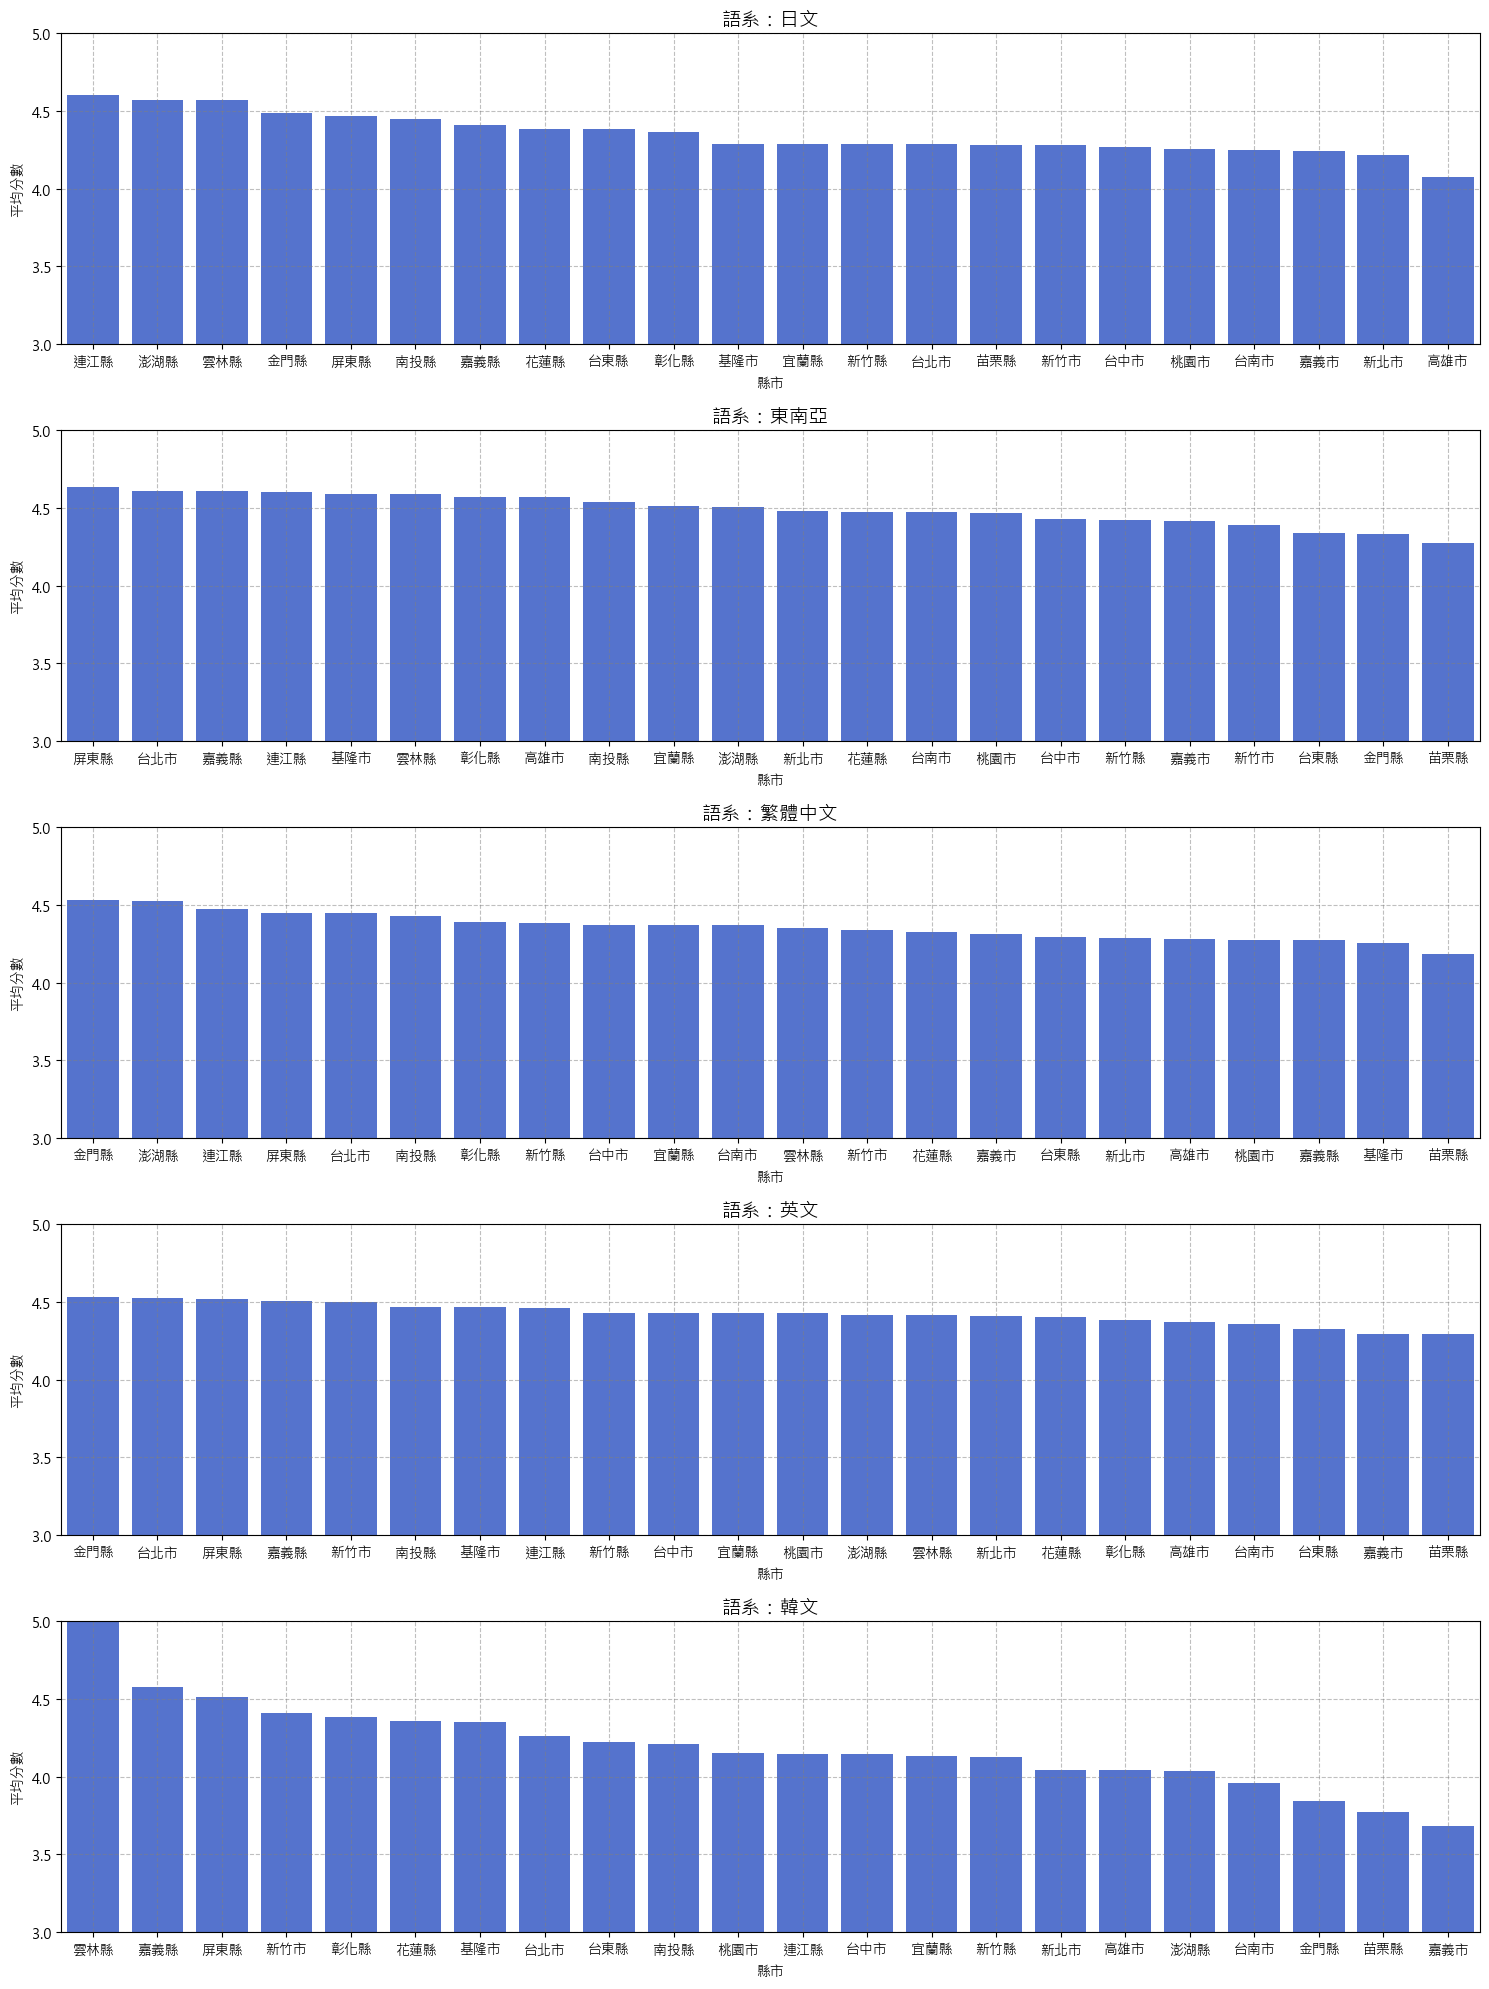

In [14]:
# 各語系中各類別平均評分 畫圖
languages = top_city_per_nation["language"].value_counts().index

# 設定前n名 設定22為全部縣市
n = 22

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個語系的子圖
for ax, language in zip(axes, languages):
    df_language = top_city_per_nation[top_city_per_nation["language"] == language].sort_values('score',ascending=False).head(n)

    sns.barplot(
        data=df_language,
        x="address",
        y="score",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"語系：{language}", fontsize=14)
    ax.set_xlabel("縣市")
    ax.set_ylabel("平均分數")
    ax.set_yticks([3.0, 3.5, 4.0, 4.5, 5.0])
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    ax.set_ylim(3.0, 5.0)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 語系縣市平均情感分數

In [15]:
# 語系縣市平均情感分數
nlp_top_city_per_nation = new_basic_info_rating_838.groupby(["language", "address"])["snownlp_scores_0-100"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
nlp_top_city_per_nation

,language,address,snownlp_scores_0-100
0,日文,台東縣,63.824074
1,日文,南投縣,63.643939
2,日文,嘉義縣,62.080488
3,日文,苗栗縣,59.816993
4,日文,桃園市,59.347548
...,...,...,...
105,韓文,基隆市,43.732057
106,韓文,新竹縣,43.435897
107,韓文,台東縣,42.684564
108,韓文,嘉義市,40.409091


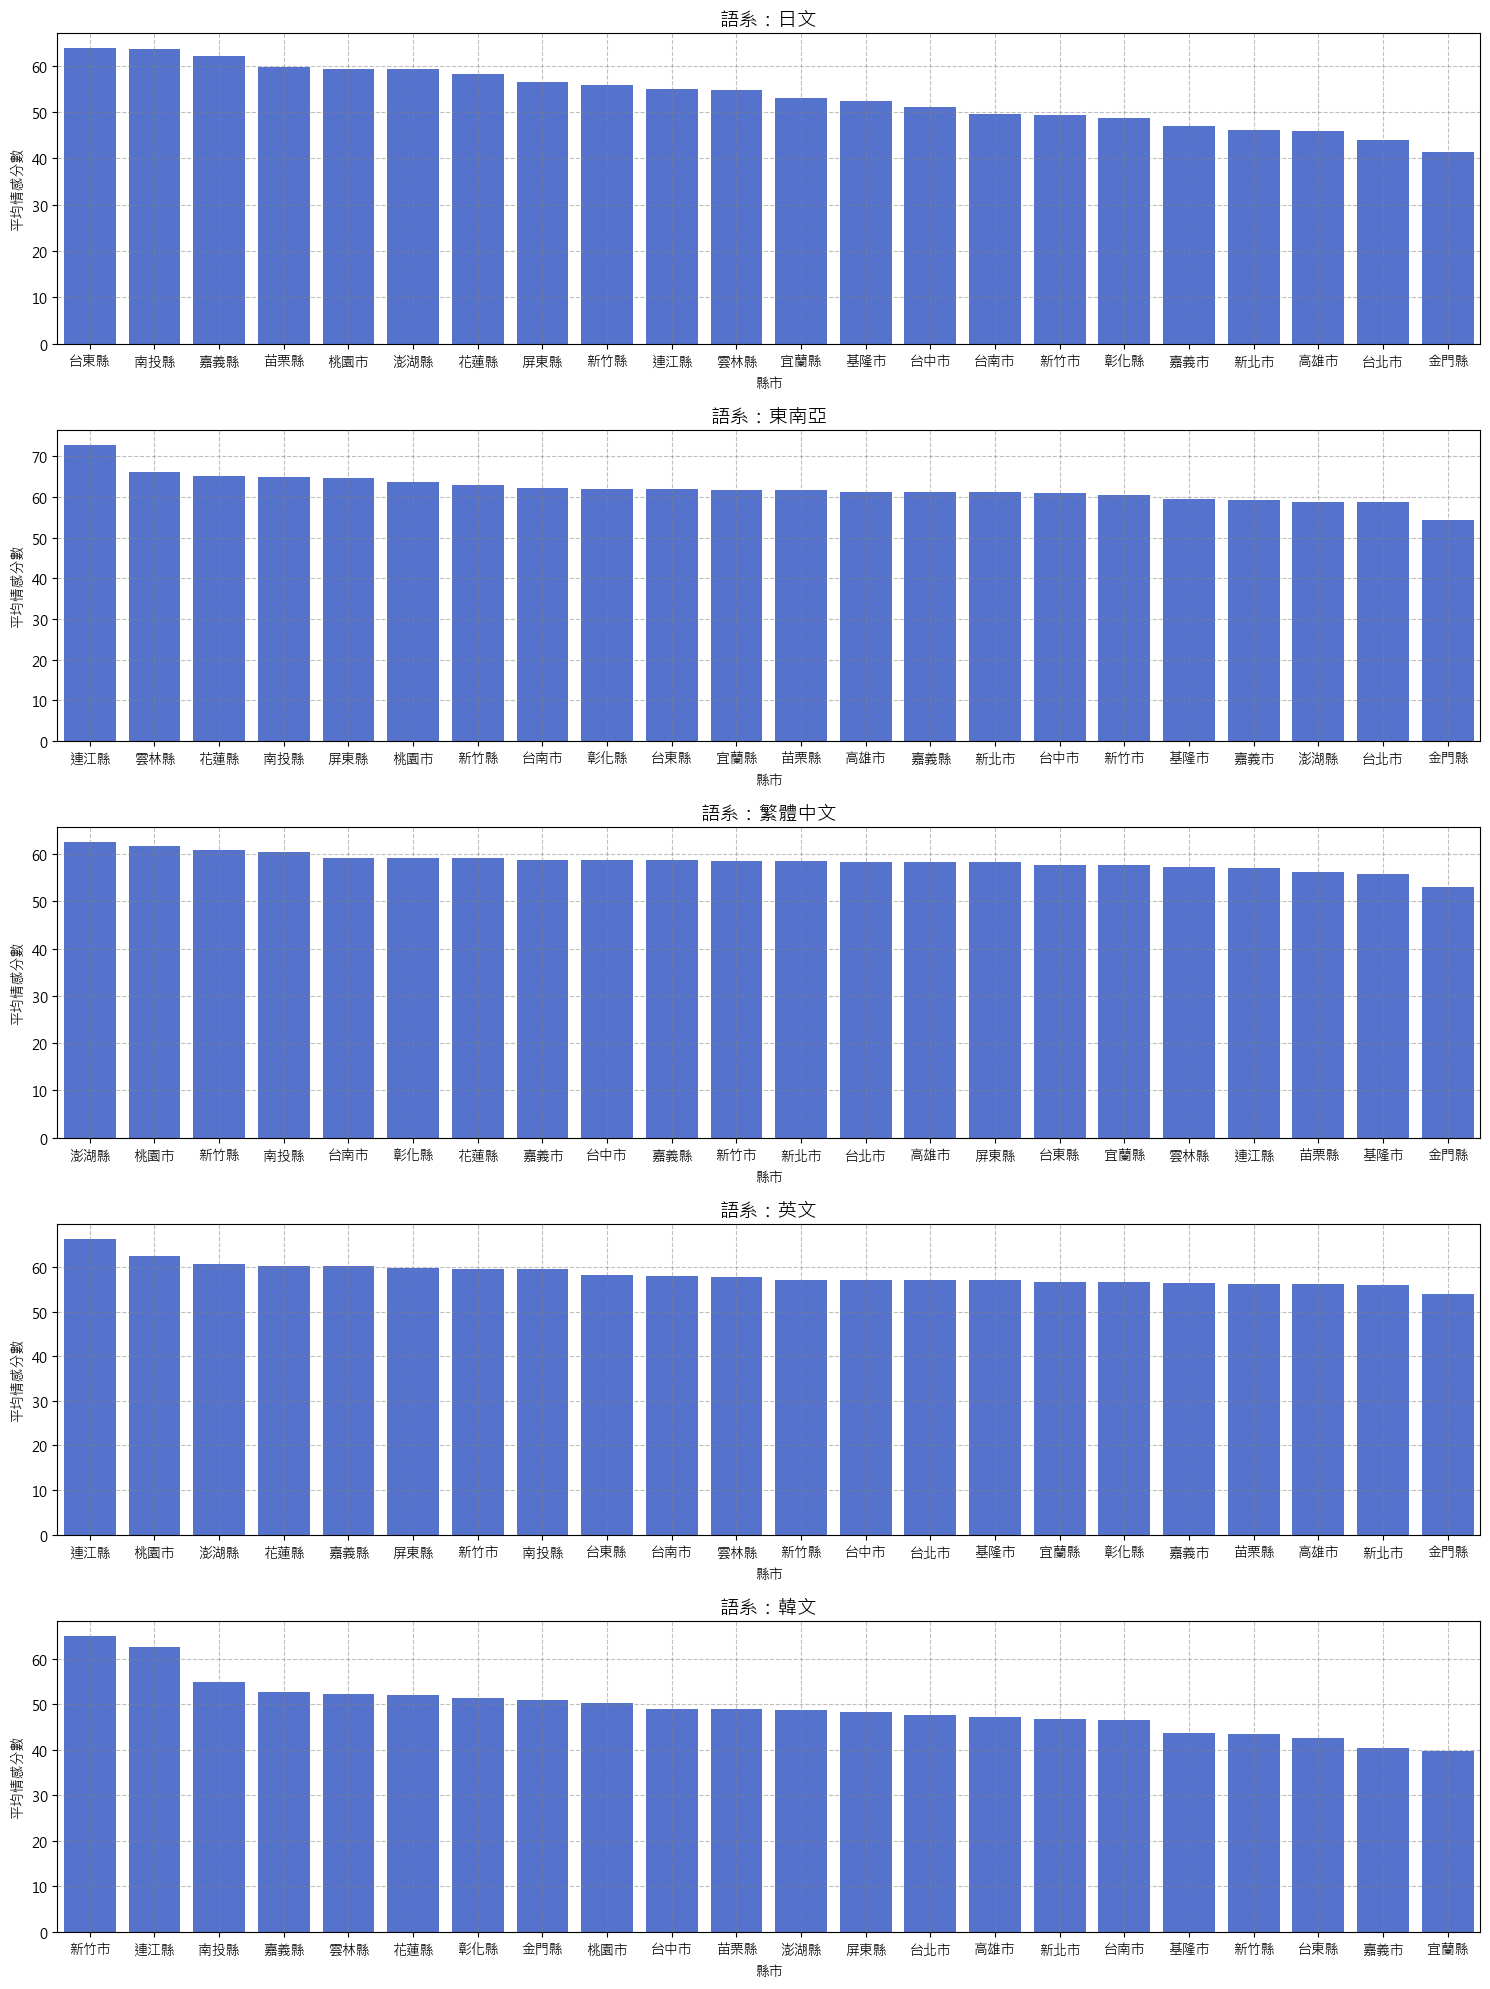

In [16]:
# 各語系中各類別平均評分 畫圖
languages = nlp_top_city_per_nation["language"].value_counts().index

# 設定前n名 設定22為全部縣市
n = 22

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個語系的子圖
for ax, language in zip(axes, languages):
    df_language = nlp_top_city_per_nation[nlp_top_city_per_nation["language"] == language].sort_values('snownlp_scores_0-100',ascending=False).head(n)

    sns.barplot(
        data=df_language,
        x="address",
        y="snownlp_scores_0-100",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"語系：{language}", fontsize=14)
    ax.set_xlabel("縣市")
    ax.set_ylabel("平均情感分數")
    # ax.set_yticks([3.0, 3.5, 4.0, 4.5, 5.0])
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    # ax.set_ylim(3.0, 5.0)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 各語系各縣市平均分數與情感分數並列

    language address     score  snownlp_scores_0-100
0         日文     連江縣  4.603448             54.948276
1         日文     澎湖縣  4.573333             59.338667
2         日文     雲林縣  4.569444             54.791667
3         日文     金門縣  4.486239             41.440367
4         日文     屏東縣  4.467164             56.577612
..       ...     ...       ...                   ...
105       韓文     澎湖縣  4.038462             48.692308
106       韓文     台南市  3.958643             46.564157
107       韓文     金門縣  3.842105             51.000000
108       韓文     苗栗縣  3.774194             48.903226
109       韓文     嘉義市  3.681818             40.409091

[110 rows x 4 columns]


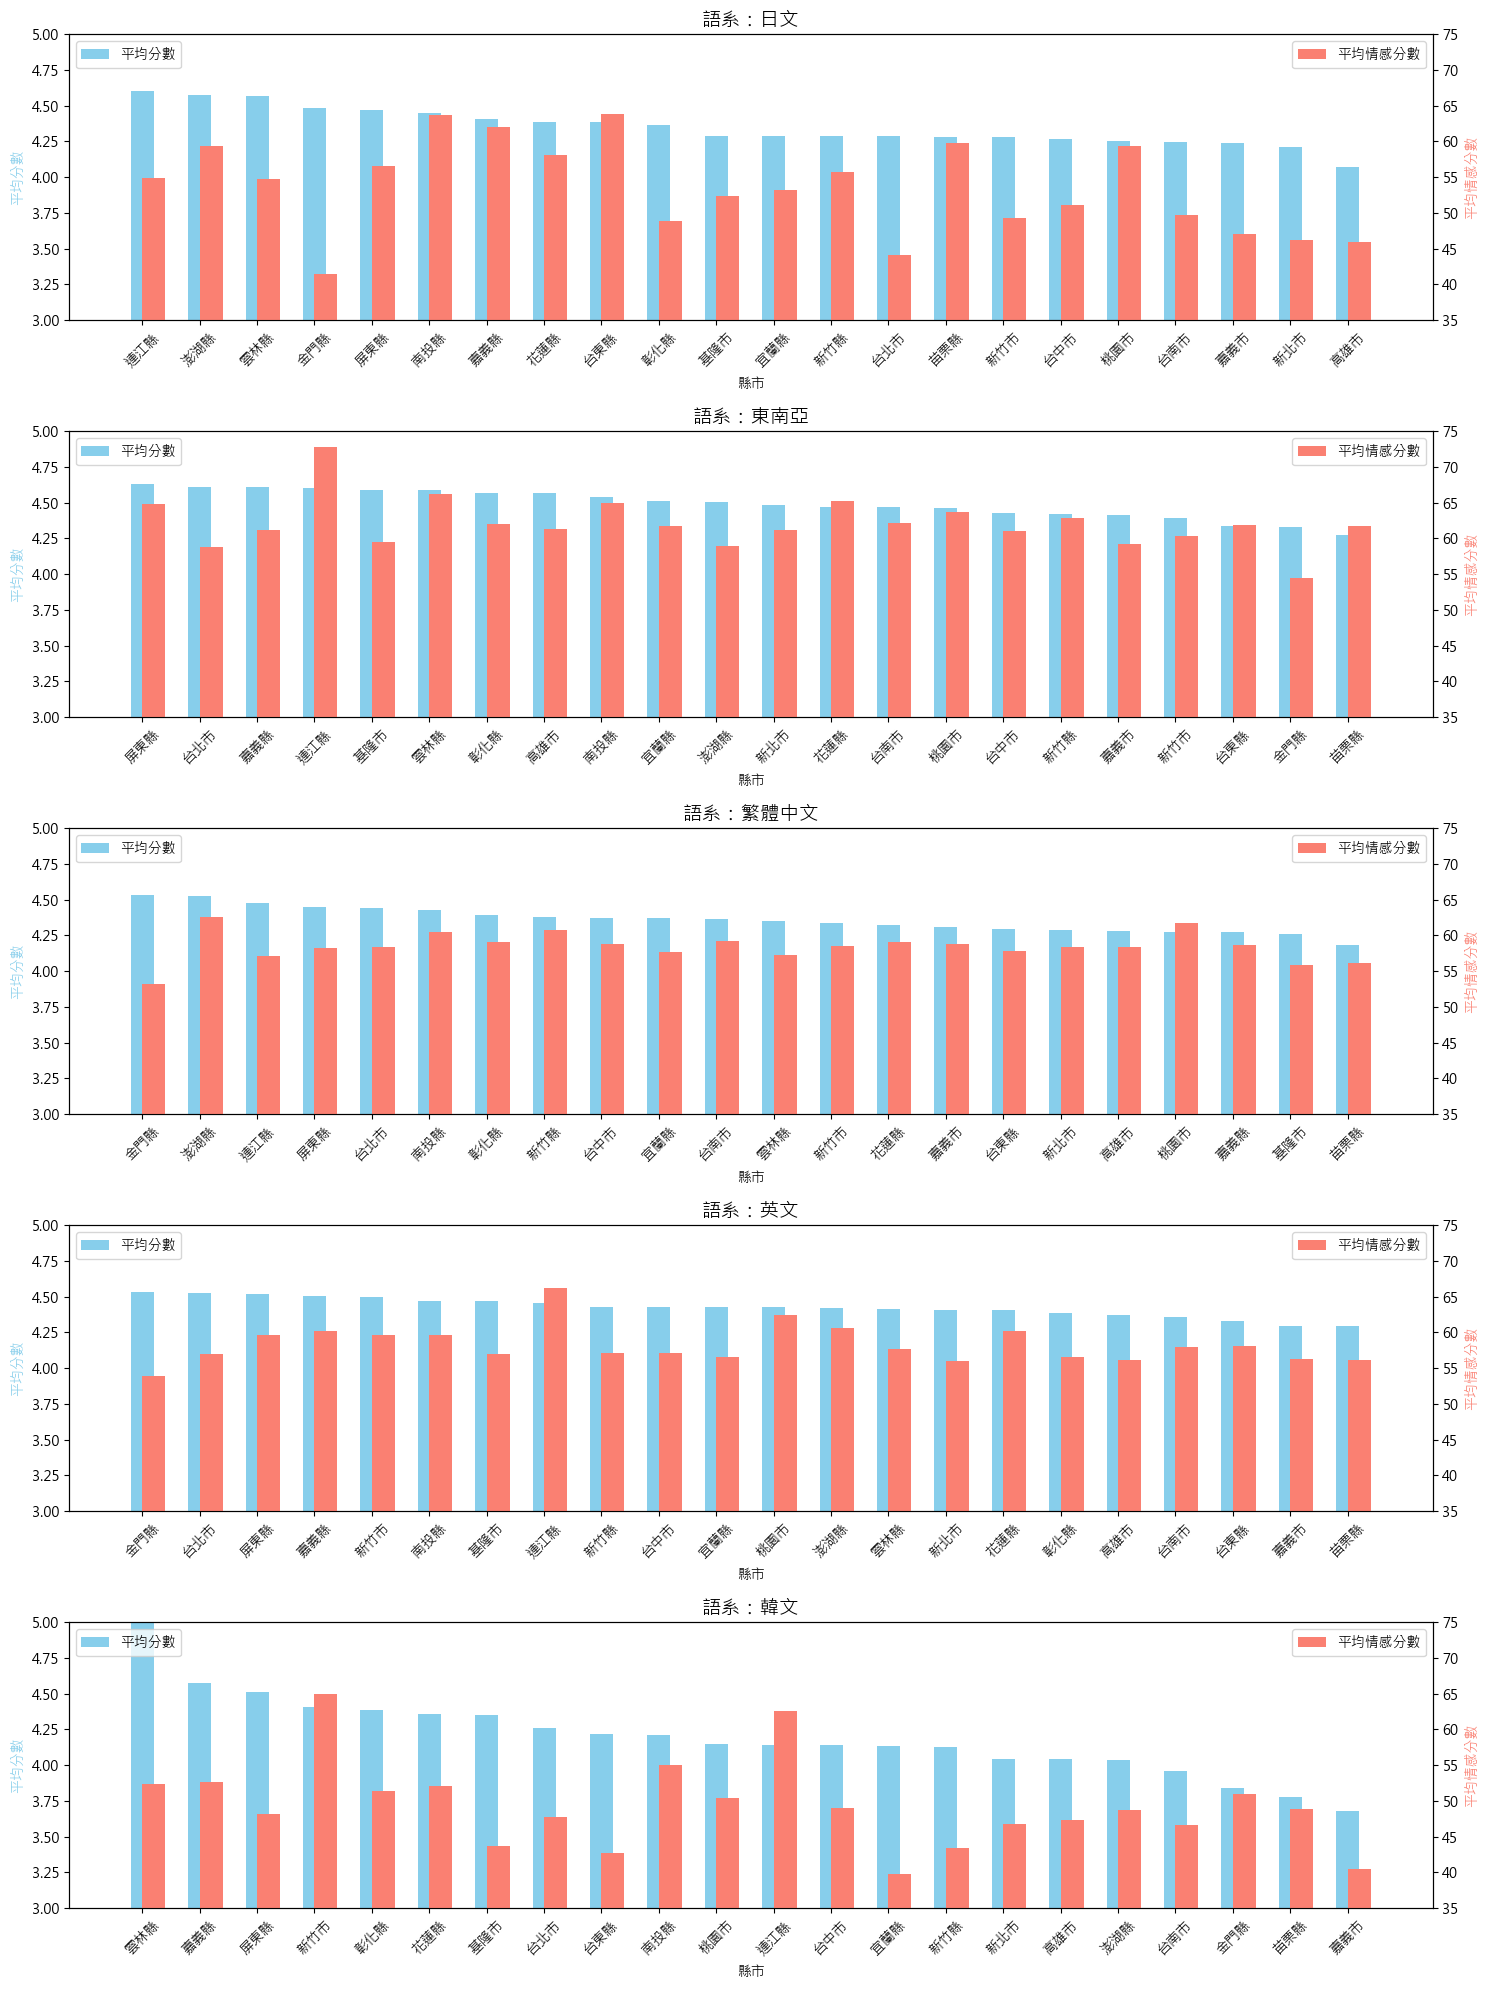

In [17]:
# 合併縣市語系評分與情感分數
top_city_per_nation_all = pd.merge(top_city_per_nation, nlp_top_city_per_nation)
print(top_city_per_nation_all)

# 各語系中各縣市平均評分 畫圖
languages = top_city_per_nation_all["language"].value_counts().index

# 設定前n名 設定22為全部縣市
n = 22

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個語系的子圖
for ax, language in zip(axes, languages):
    df_language = top_city_per_nation_all[top_city_per_nation_all["language"] == language].sort_values('score',ascending=False).head(n)
    
    # 設定 X 軸標籤的位置（讓兩個長條並排）
    x_indexes = np.arange(len(df_language))
    
    color='skyblue'
    ax.bar(
        x_indexes,
        df_language["score"],
        width=0.4,
        label="平均分數",
        color=color,
        align = "center"
    )
    ax.set_title(f"語系：{language}", fontsize=14) 
    ax.set_xlabel("縣市") 
    ax.set_ylabel("平均分數", color=color)    

    # 創建第二個 Y 軸 (右 Y 軸)
    ax2 = ax.twinx()

    
    # 繪製「平均情感分數」的長條圖（右 Y 軸）
    color="salmon"
    ax2.bar(
        x_indexes,
        df_language["snownlp_scores_0-100"],
        width=0.4,
        label="平均情感分數",
        color=color,
        align = "edge"
    )
    ax2.set_ylabel("平均情感分數", color=color)    

    # 設定 X 軸刻度標籤
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(df_language["address"], rotation=45)

    # 設定 Y 軸範圍
    ax.set_ylim(3, 5)
    ax2.set_ylim(35, 75)

    # 顯示圖例
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

plt.tight_layout()
plt.show()

## 語系與類別評分

### 依類別畫評分子圖

In [18]:
# 語系類別平均評分
top_type_per_nation = new_basic_info_rating_838.groupby(["attraction_type", "language"])["score"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
top_type_per_nation

,attraction_type,language,score
0,人文歷史,東南亞,4.539647
1,人文歷史,英文,4.444732
2,人文歷史,繁體中文,4.336378
3,人文歷史,日文,4.247627
4,人文歷史,韓文,4.125405
5,城市景觀,東南亞,4.527423
6,城市景觀,英文,4.412413
7,城市景觀,繁體中文,4.320785
8,城市景觀,日文,4.196139
9,城市景觀,韓文,4.097325


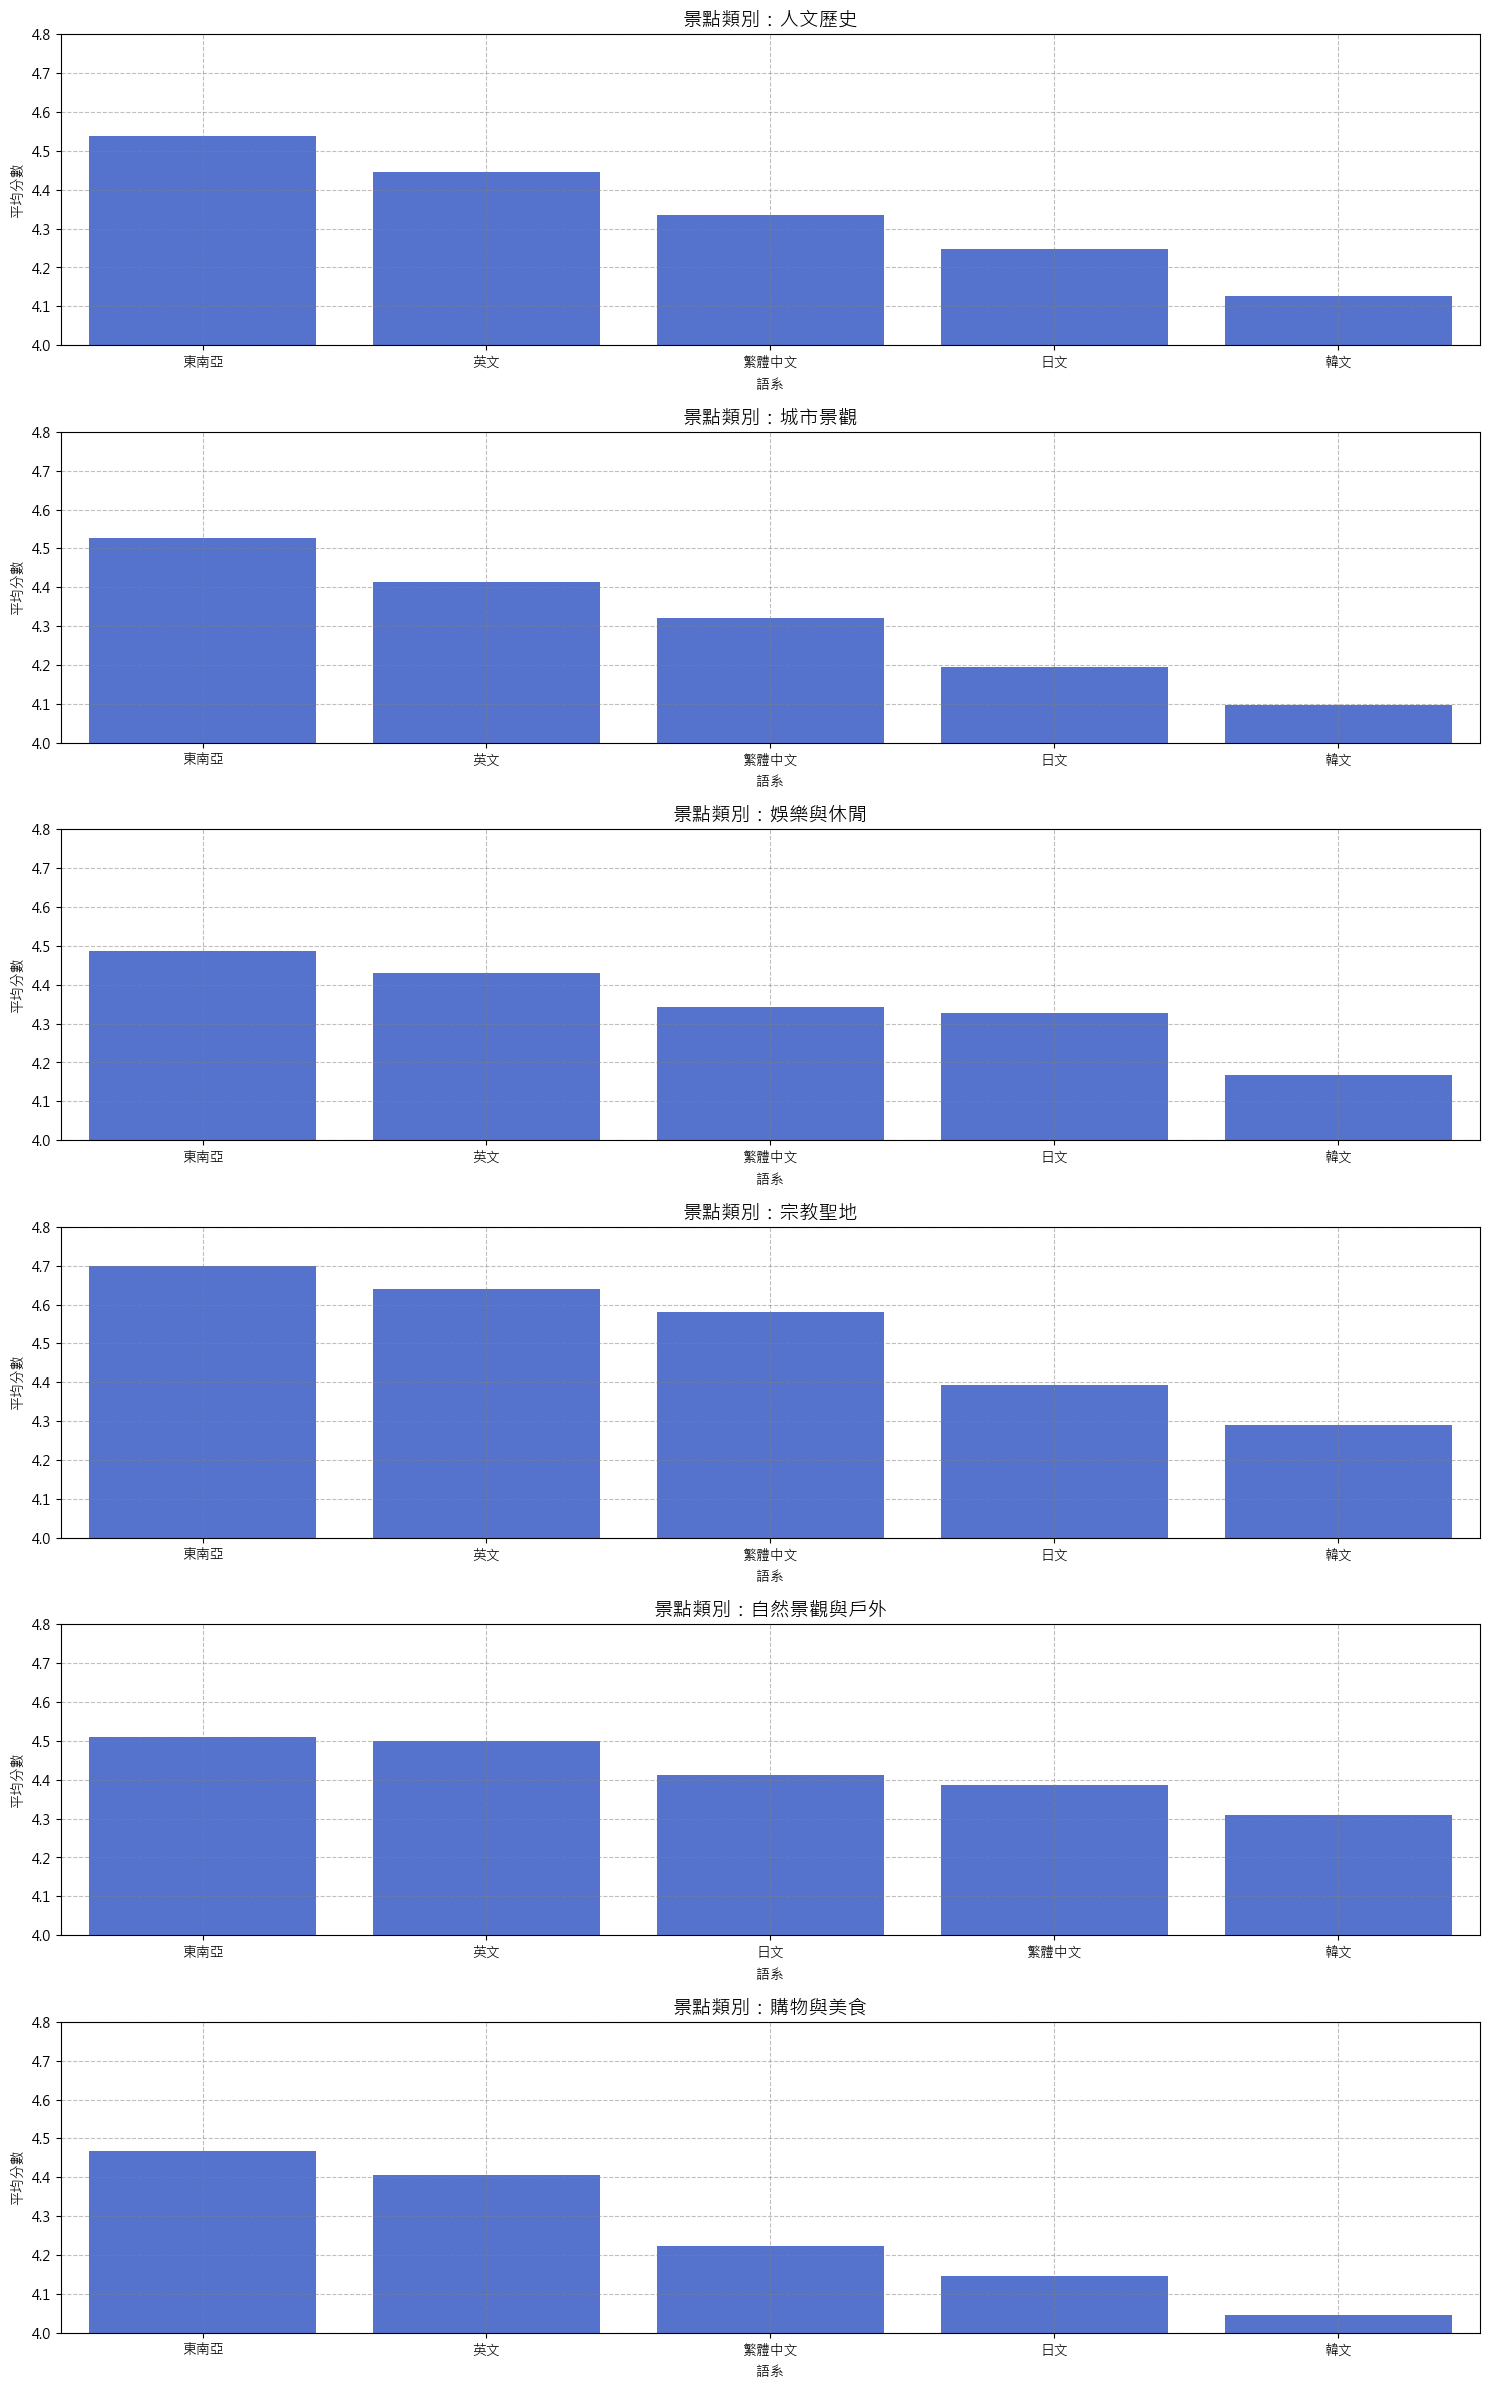

In [19]:
# 各類別中各語系平均評分畫圖
categories = top_type_per_nation["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    df_category = top_type_per_nation[top_type_per_nation["attraction_type"] == category]

    sns.barplot(
        data=df_category,
        x="language",
        y="score",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("語系") 
    ax.set_ylabel("平均分數") 
    ax.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8])
    ax.grid(linestyle='--',color='gray', alpha=0.5)
    ax.set_ylim(4.0, 4.8)


plt.tight_layout()
plt.show()

### 依語系畫評分子圖

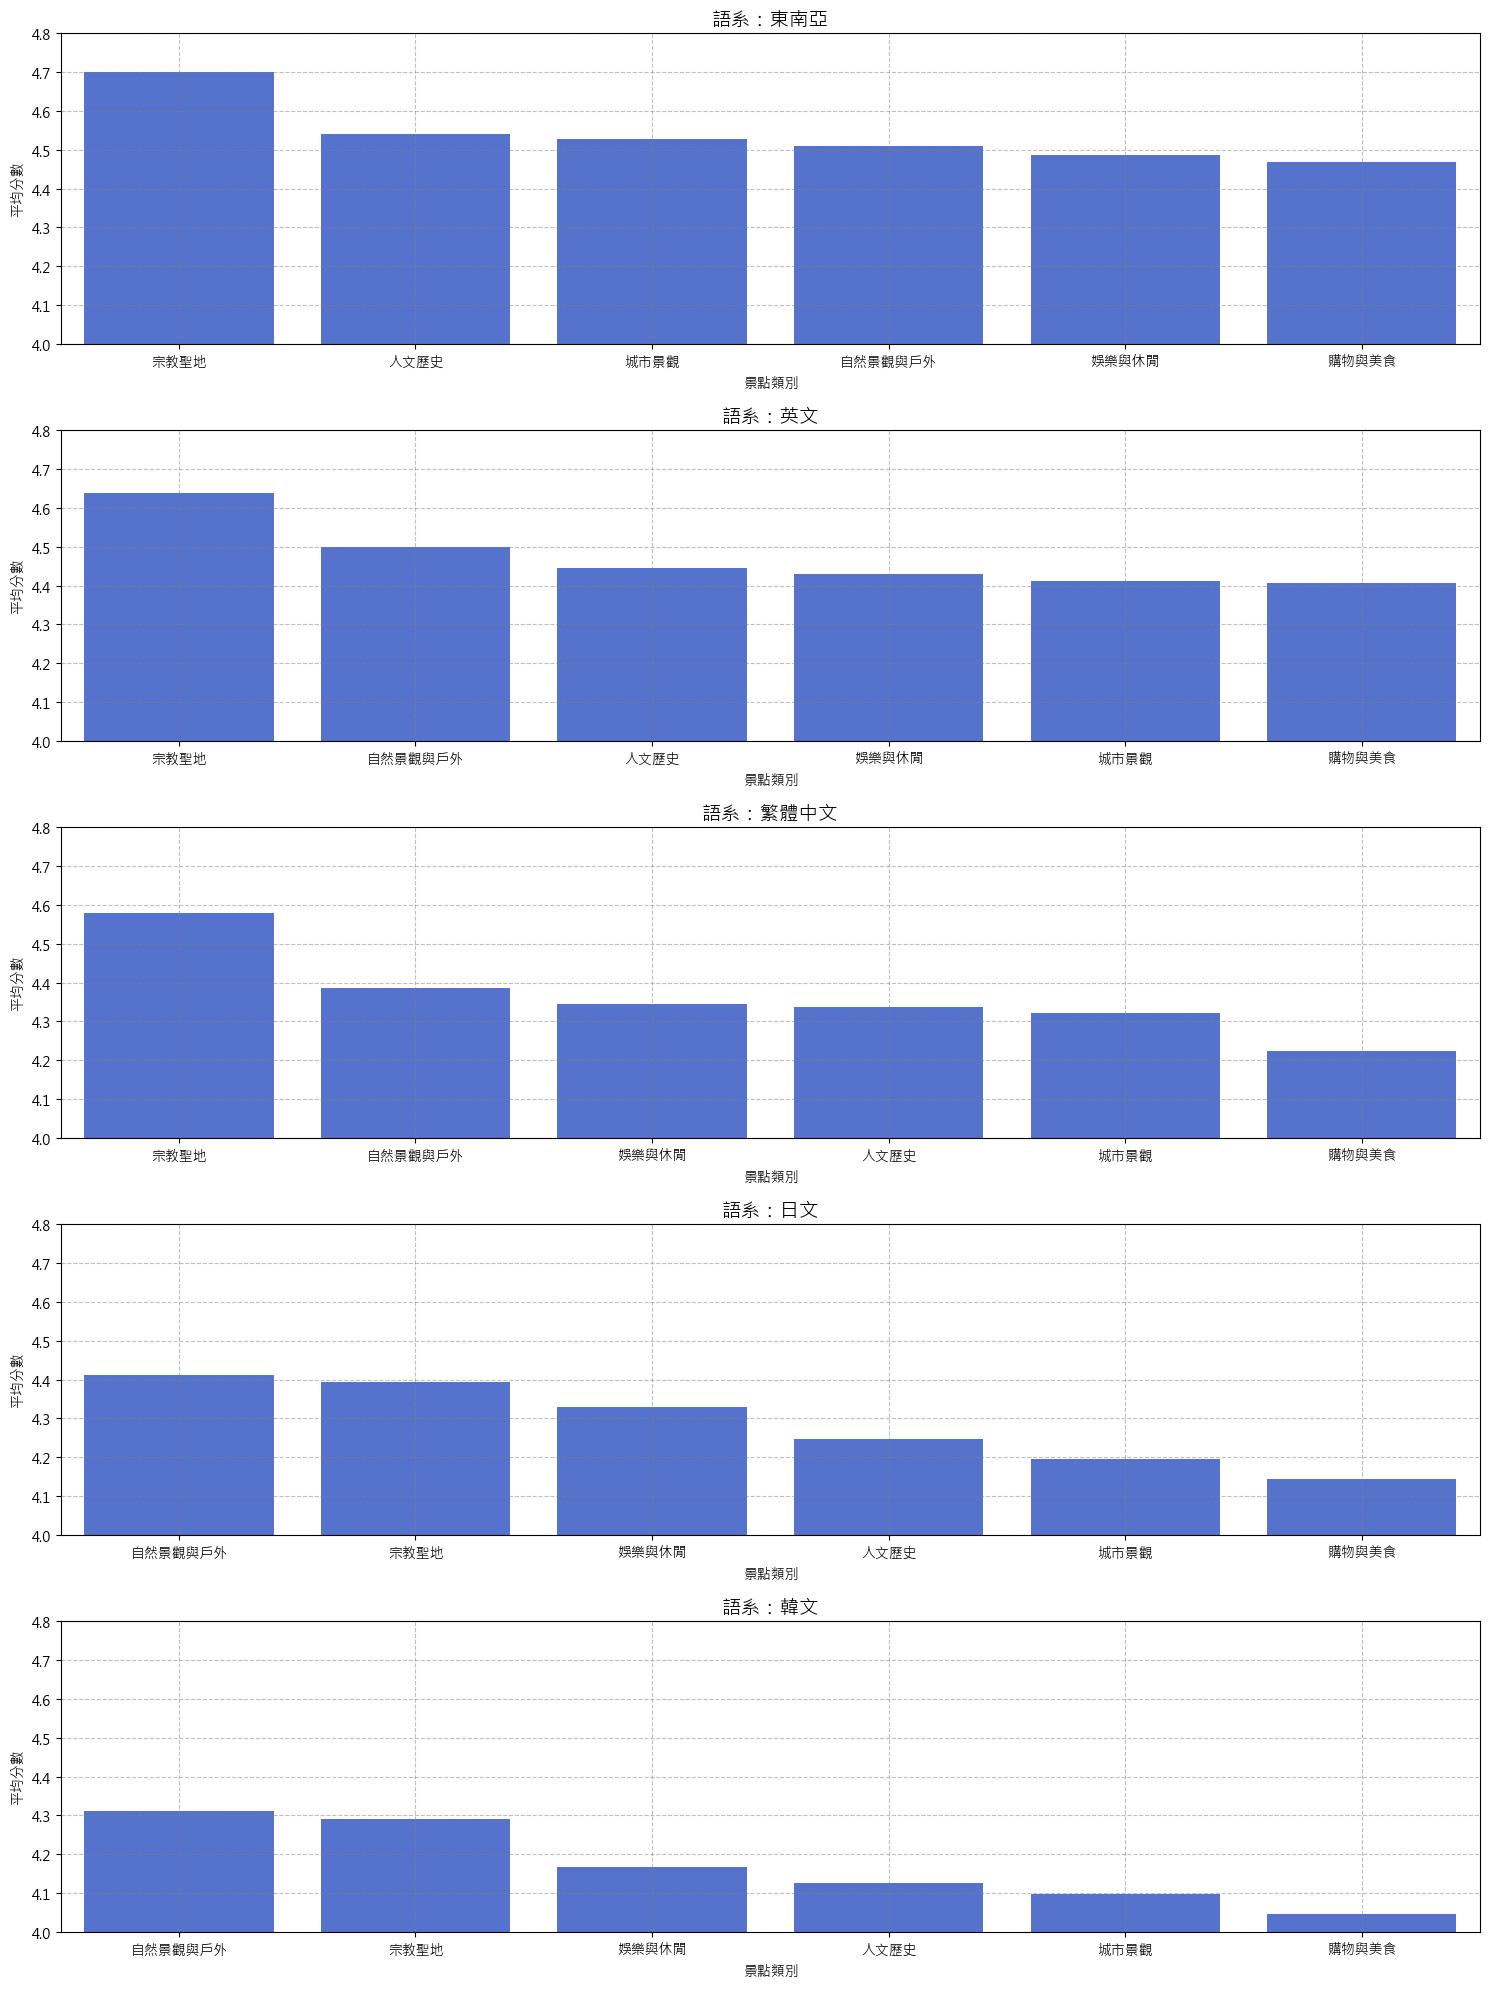

In [20]:
# 各語系中各類別平均評分 畫圖
languages = top_type_per_nation["language"].value_counts().index

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個國籍的子圖
for ax, language in zip(axes, languages):
    df_language = top_type_per_nation[top_type_per_nation["language"] == language].sort_values('score',ascending=False)

    sns.barplot(
        data=df_language,
        x="attraction_type",
        y="score",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"語系：{language}", fontsize=14)
    ax.set_xlabel("景點類別")
    ax.set_ylabel("平均分數")
    ax.set_yticks([4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8])
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    ax.set_ylim(4.0, 4.8)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 依類別畫情感分數子圖

In [21]:
# 語系類別平均情感分數
nlp_top_type_per_nation = new_basic_info_rating_838.groupby(["attraction_type", "language"])["snownlp_scores_0-100"].mean().groupby(level=0, group_keys=False).apply(lambda x: x.sort_values(ascending=False)).reset_index()
nlp_top_type_per_nation

,attraction_type,language,snownlp_scores_0-100
0,人文歷史,東南亞,58.693186
1,人文歷史,繁體中文,57.700082
2,人文歷史,英文,55.191810
3,人文歷史,韓文,45.417139
4,人文歷史,日文,44.384078
5,城市景觀,東南亞,62.153402
6,城市景觀,英文,59.859219
7,城市景觀,繁體中文,58.020518
8,城市景觀,韓文,52.238801
9,城市景觀,日文,51.743145


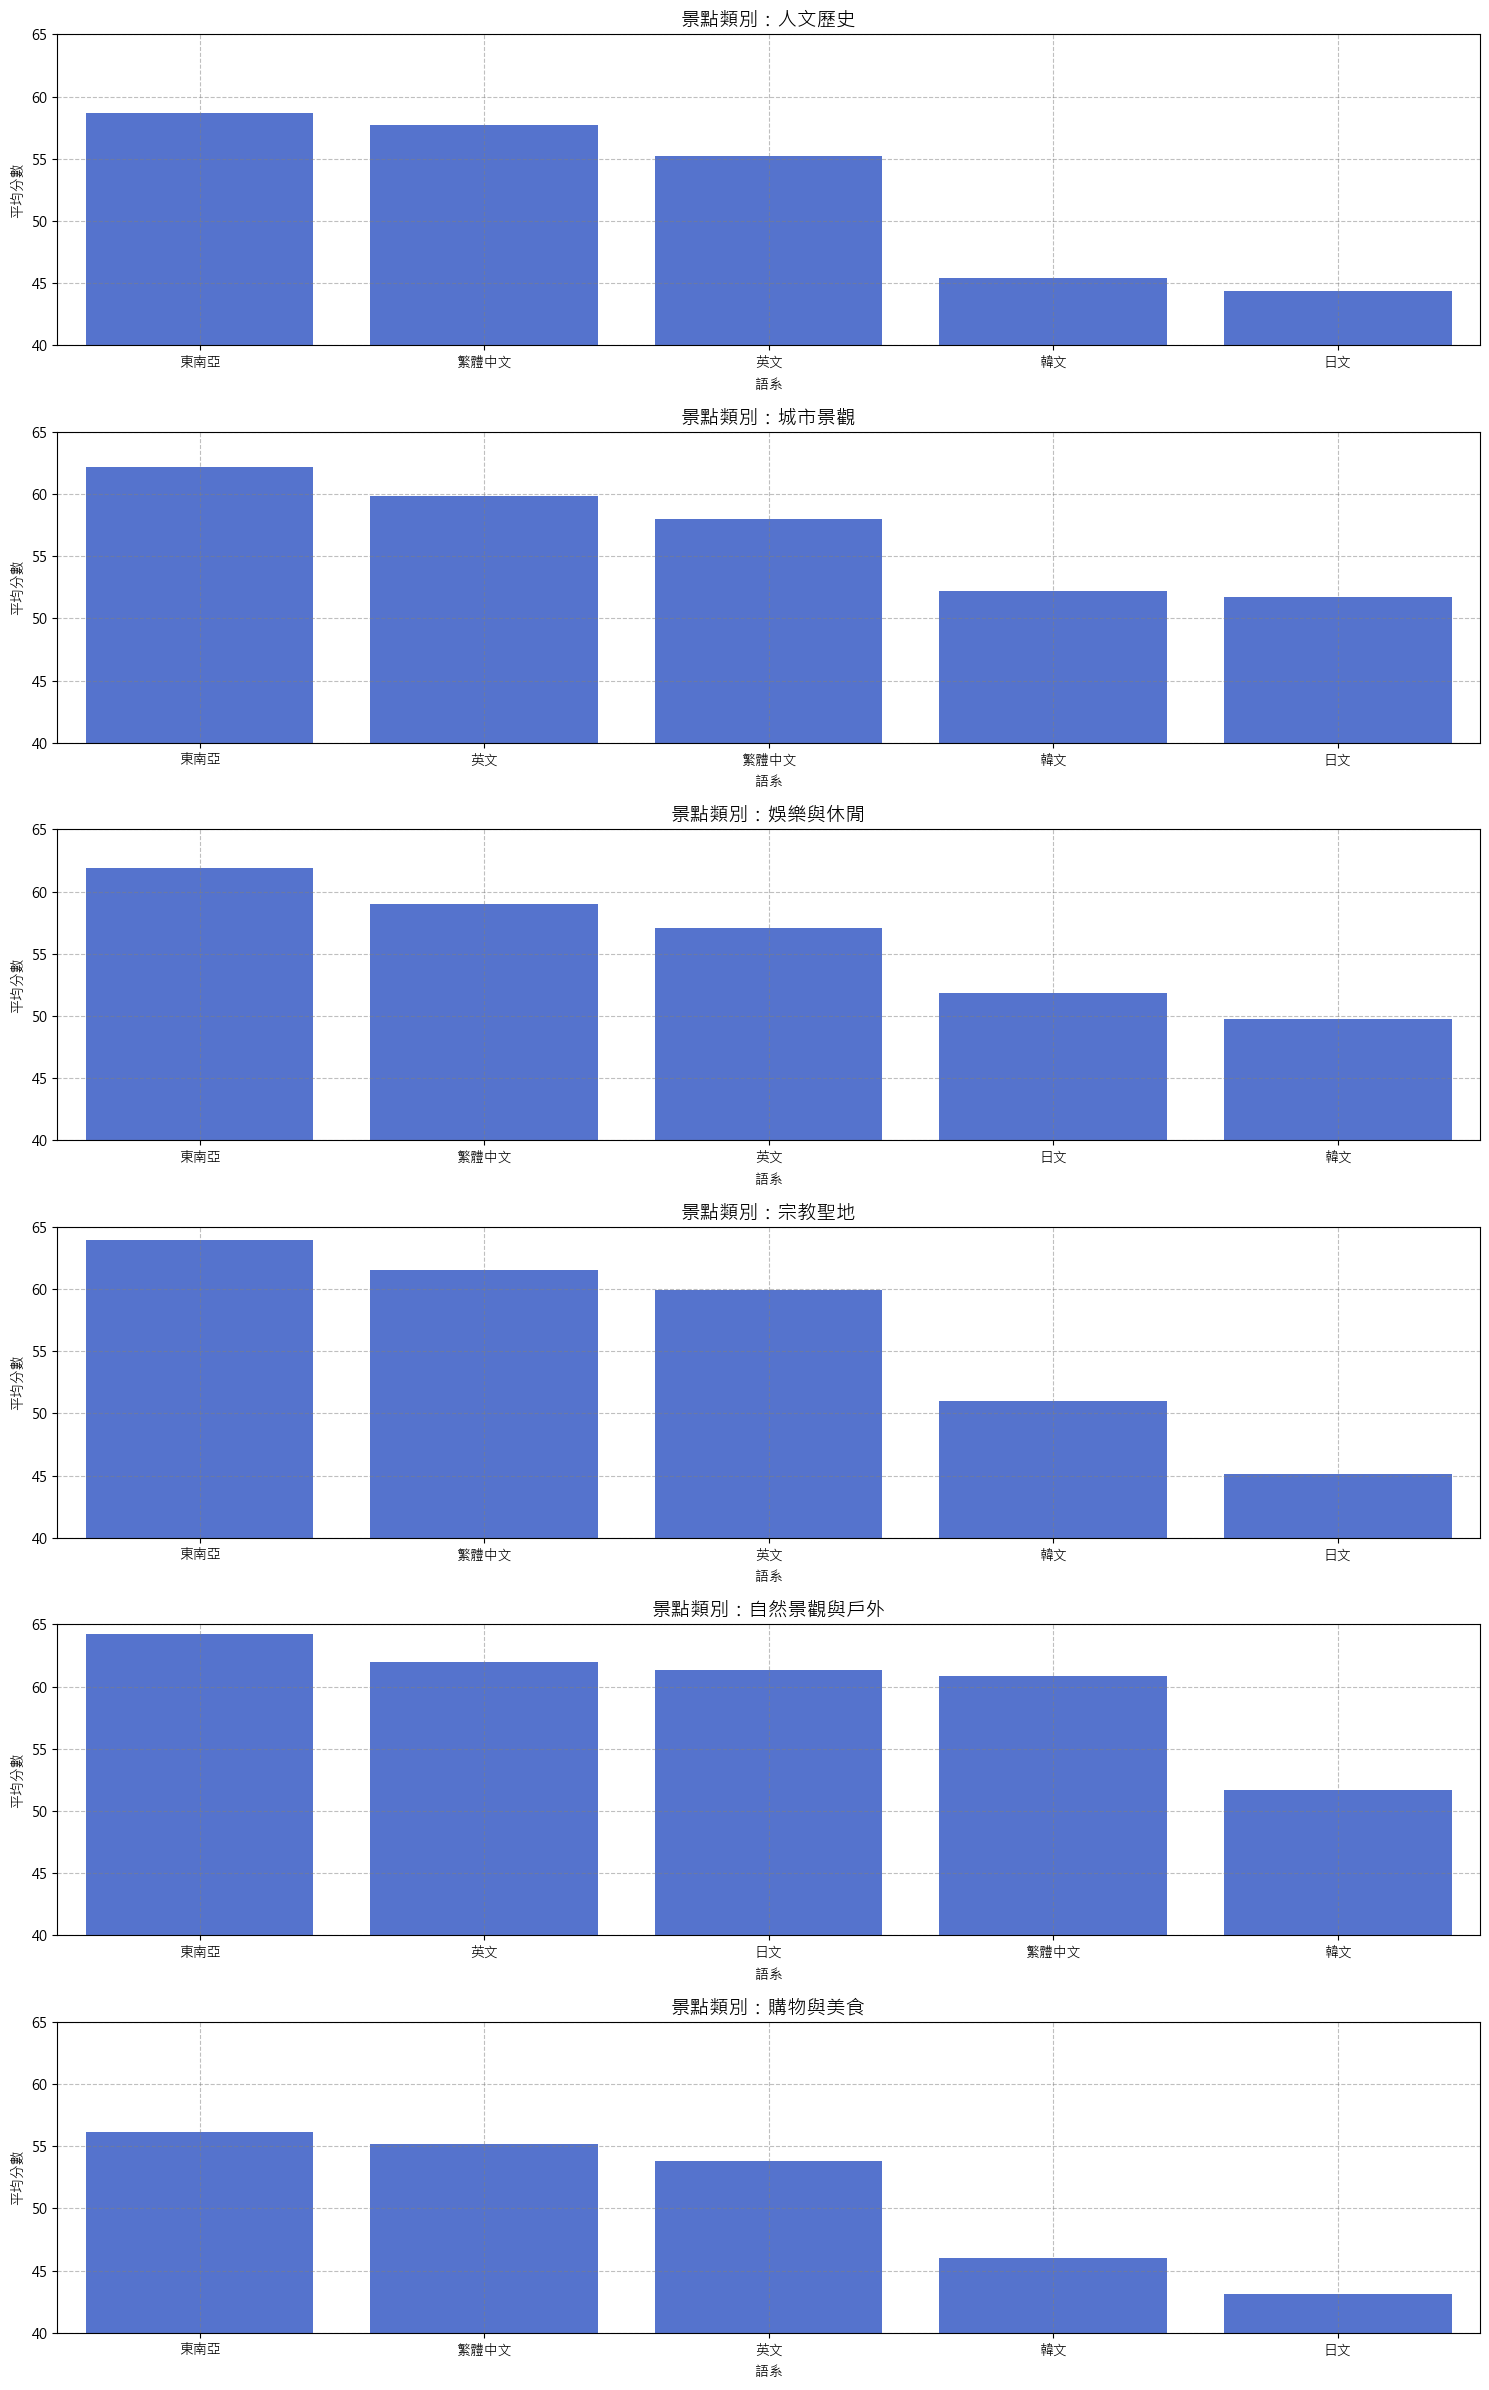

In [22]:
# 類別中各語系平均情感分數畫圖
categories = nlp_top_type_per_nation["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    df_category = nlp_top_type_per_nation[nlp_top_type_per_nation["attraction_type"] == category]

    sns.barplot(
        data=df_category.sort_values('snownlp_scores_0-100',ascending=False),
        x="language",
        y="snownlp_scores_0-100",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("語系") 
    ax.set_ylabel("平均分數") 
    ax.grid(linestyle='--',color='gray', alpha=0.5)
    ax.set_ylim(40, 65)


plt.tight_layout()
plt.show()

### 依語系畫情感分數子圖

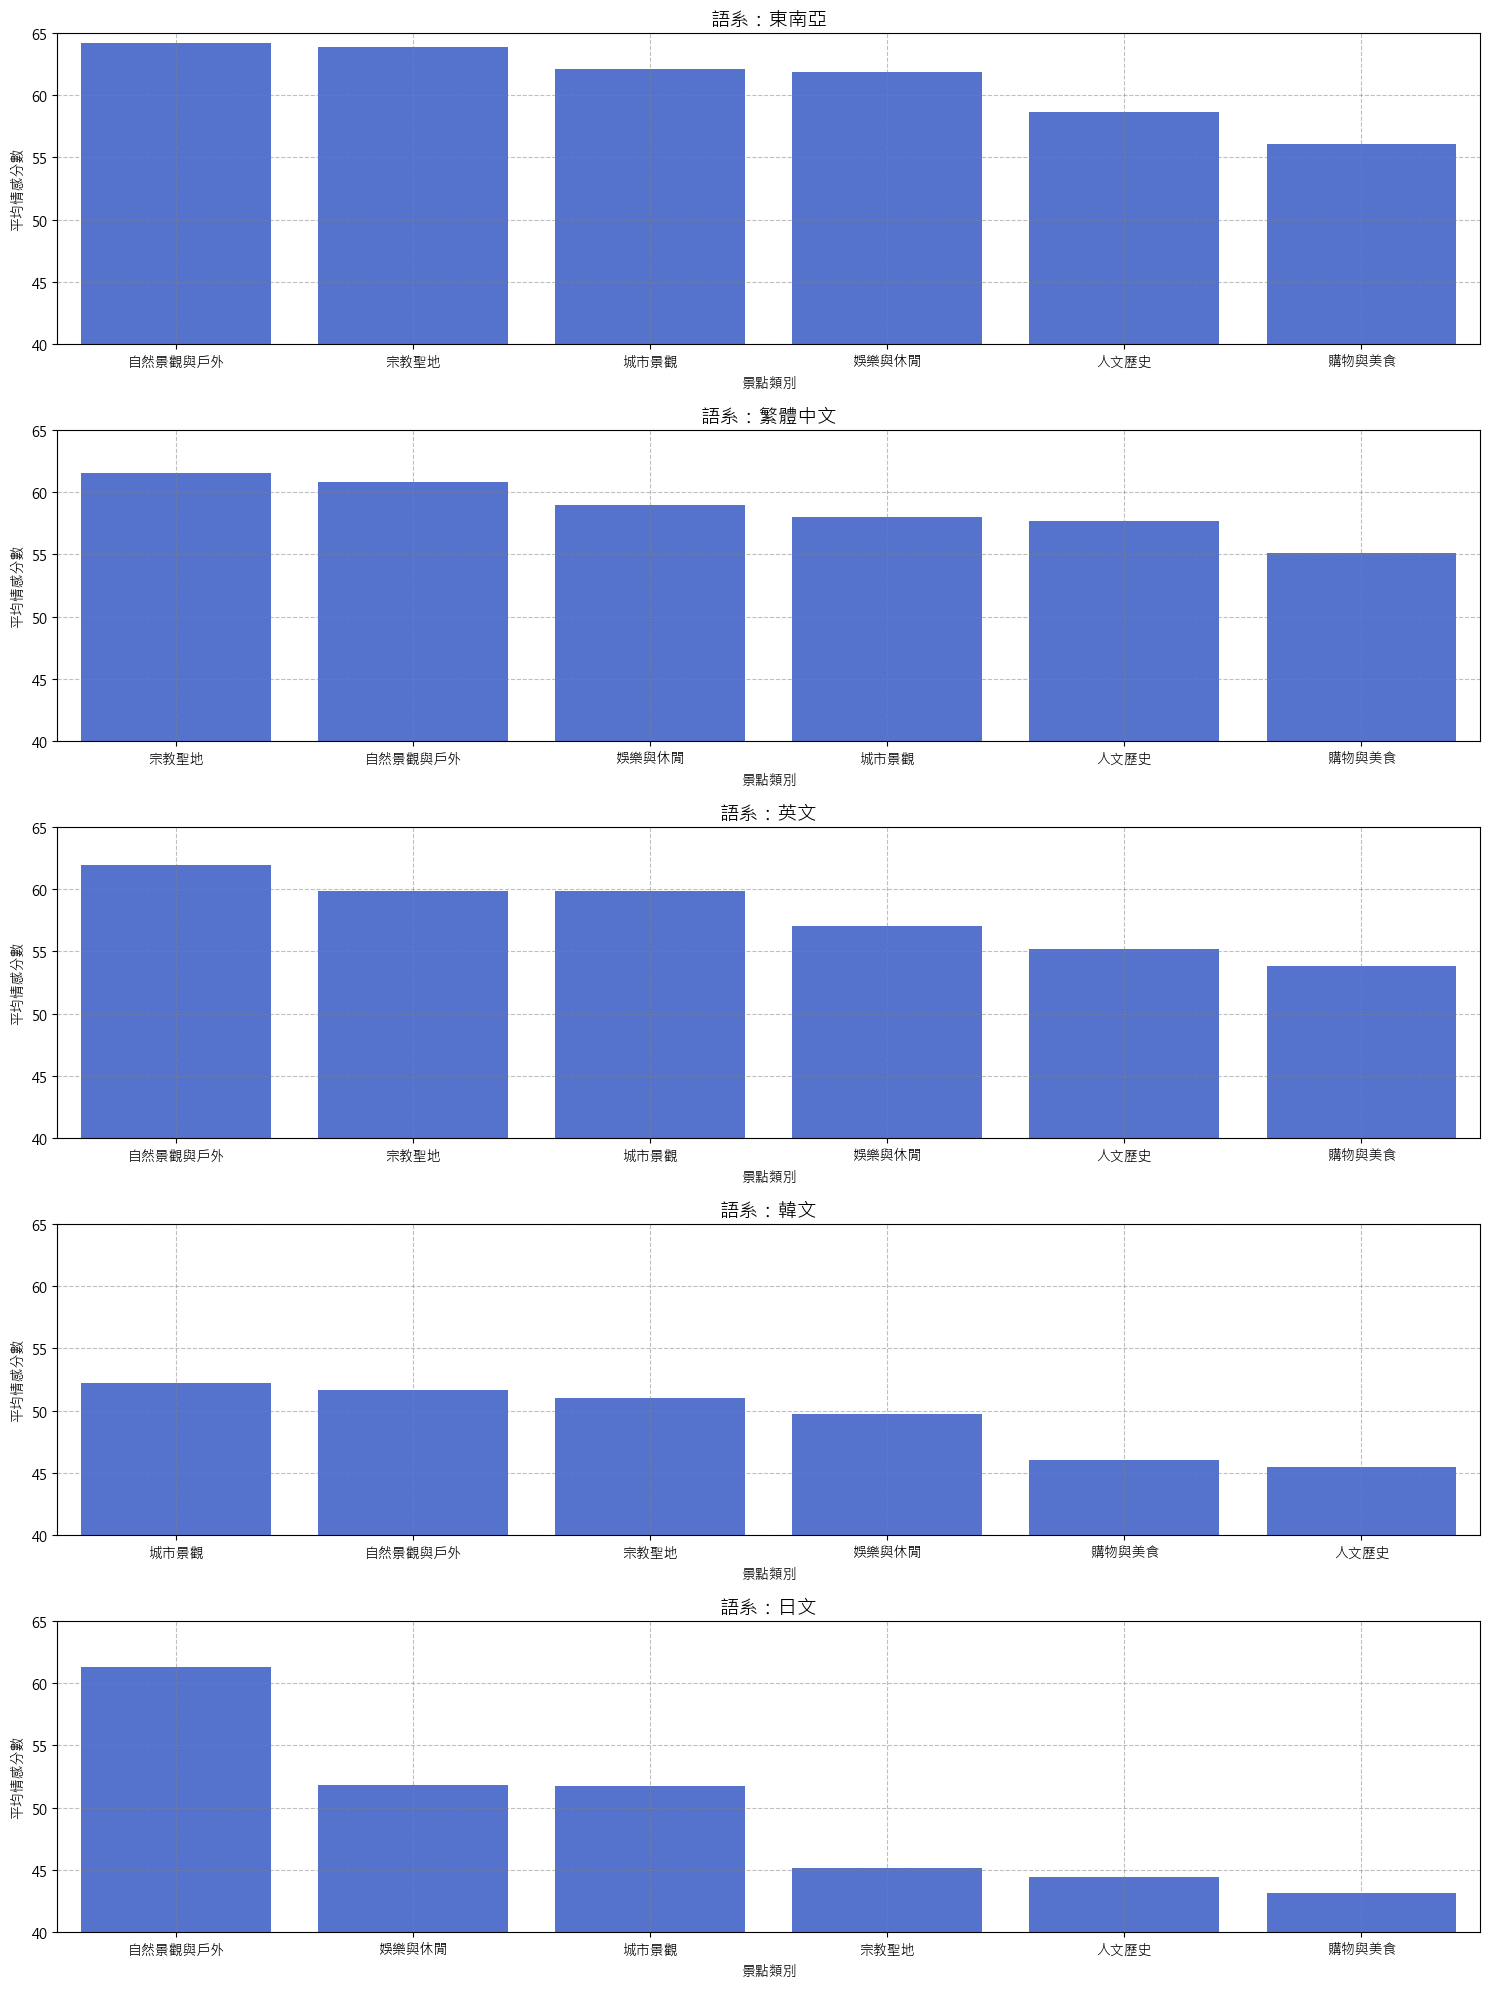

In [23]:
# 各語系中各類別平均評分 畫圖
languages = nlp_top_type_per_nation["language"].value_counts().sort_values(ascending=False).index

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=len(languages), ncols=1, figsize=(15, 4 * len(languages)))

# 繪製每個語系的子圖
for ax, language in zip(axes, languages):
    df_language = nlp_top_type_per_nation[nlp_top_type_per_nation["language"] == language]

    sns.barplot(
        data=df_language.sort_values('snownlp_scores_0-100',ascending=False),
        x="attraction_type",
        y="snownlp_scores_0-100",
        ax=ax,
        ci=None,
        color="royalblue"
    )

    ax.set_title(f"語系：{language}", fontsize=14)
    ax.set_xlabel("景點類別")
    ax.set_ylabel("平均情感分數")
    ax.grid(linestyle='--', color='gray', alpha=0.5)
    ax.set_ylim(40, 65)
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 依類別並列評分與情感分數

In [24]:
# 合併評分與情感分數
top_type_per_nation_merged = pd.merge(top_type_per_nation, nlp_top_type_per_nation)
top_type_per_nation_merged

,attraction_type,language,score,snownlp_scores_0-100
0,人文歷史,東南亞,4.539647,58.693186
1,人文歷史,英文,4.444732,55.191810
2,人文歷史,繁體中文,4.336378,57.700082
3,人文歷史,日文,4.247627,44.384078
4,人文歷史,韓文,4.125405,45.417139
5,城市景觀,東南亞,4.527423,62.153402
6,城市景觀,英文,4.412413,59.859219
7,城市景觀,繁體中文,4.320785,58.020518
8,城市景觀,日文,4.196139,51.743145
9,城市景觀,韓文,4.097325,52.238801


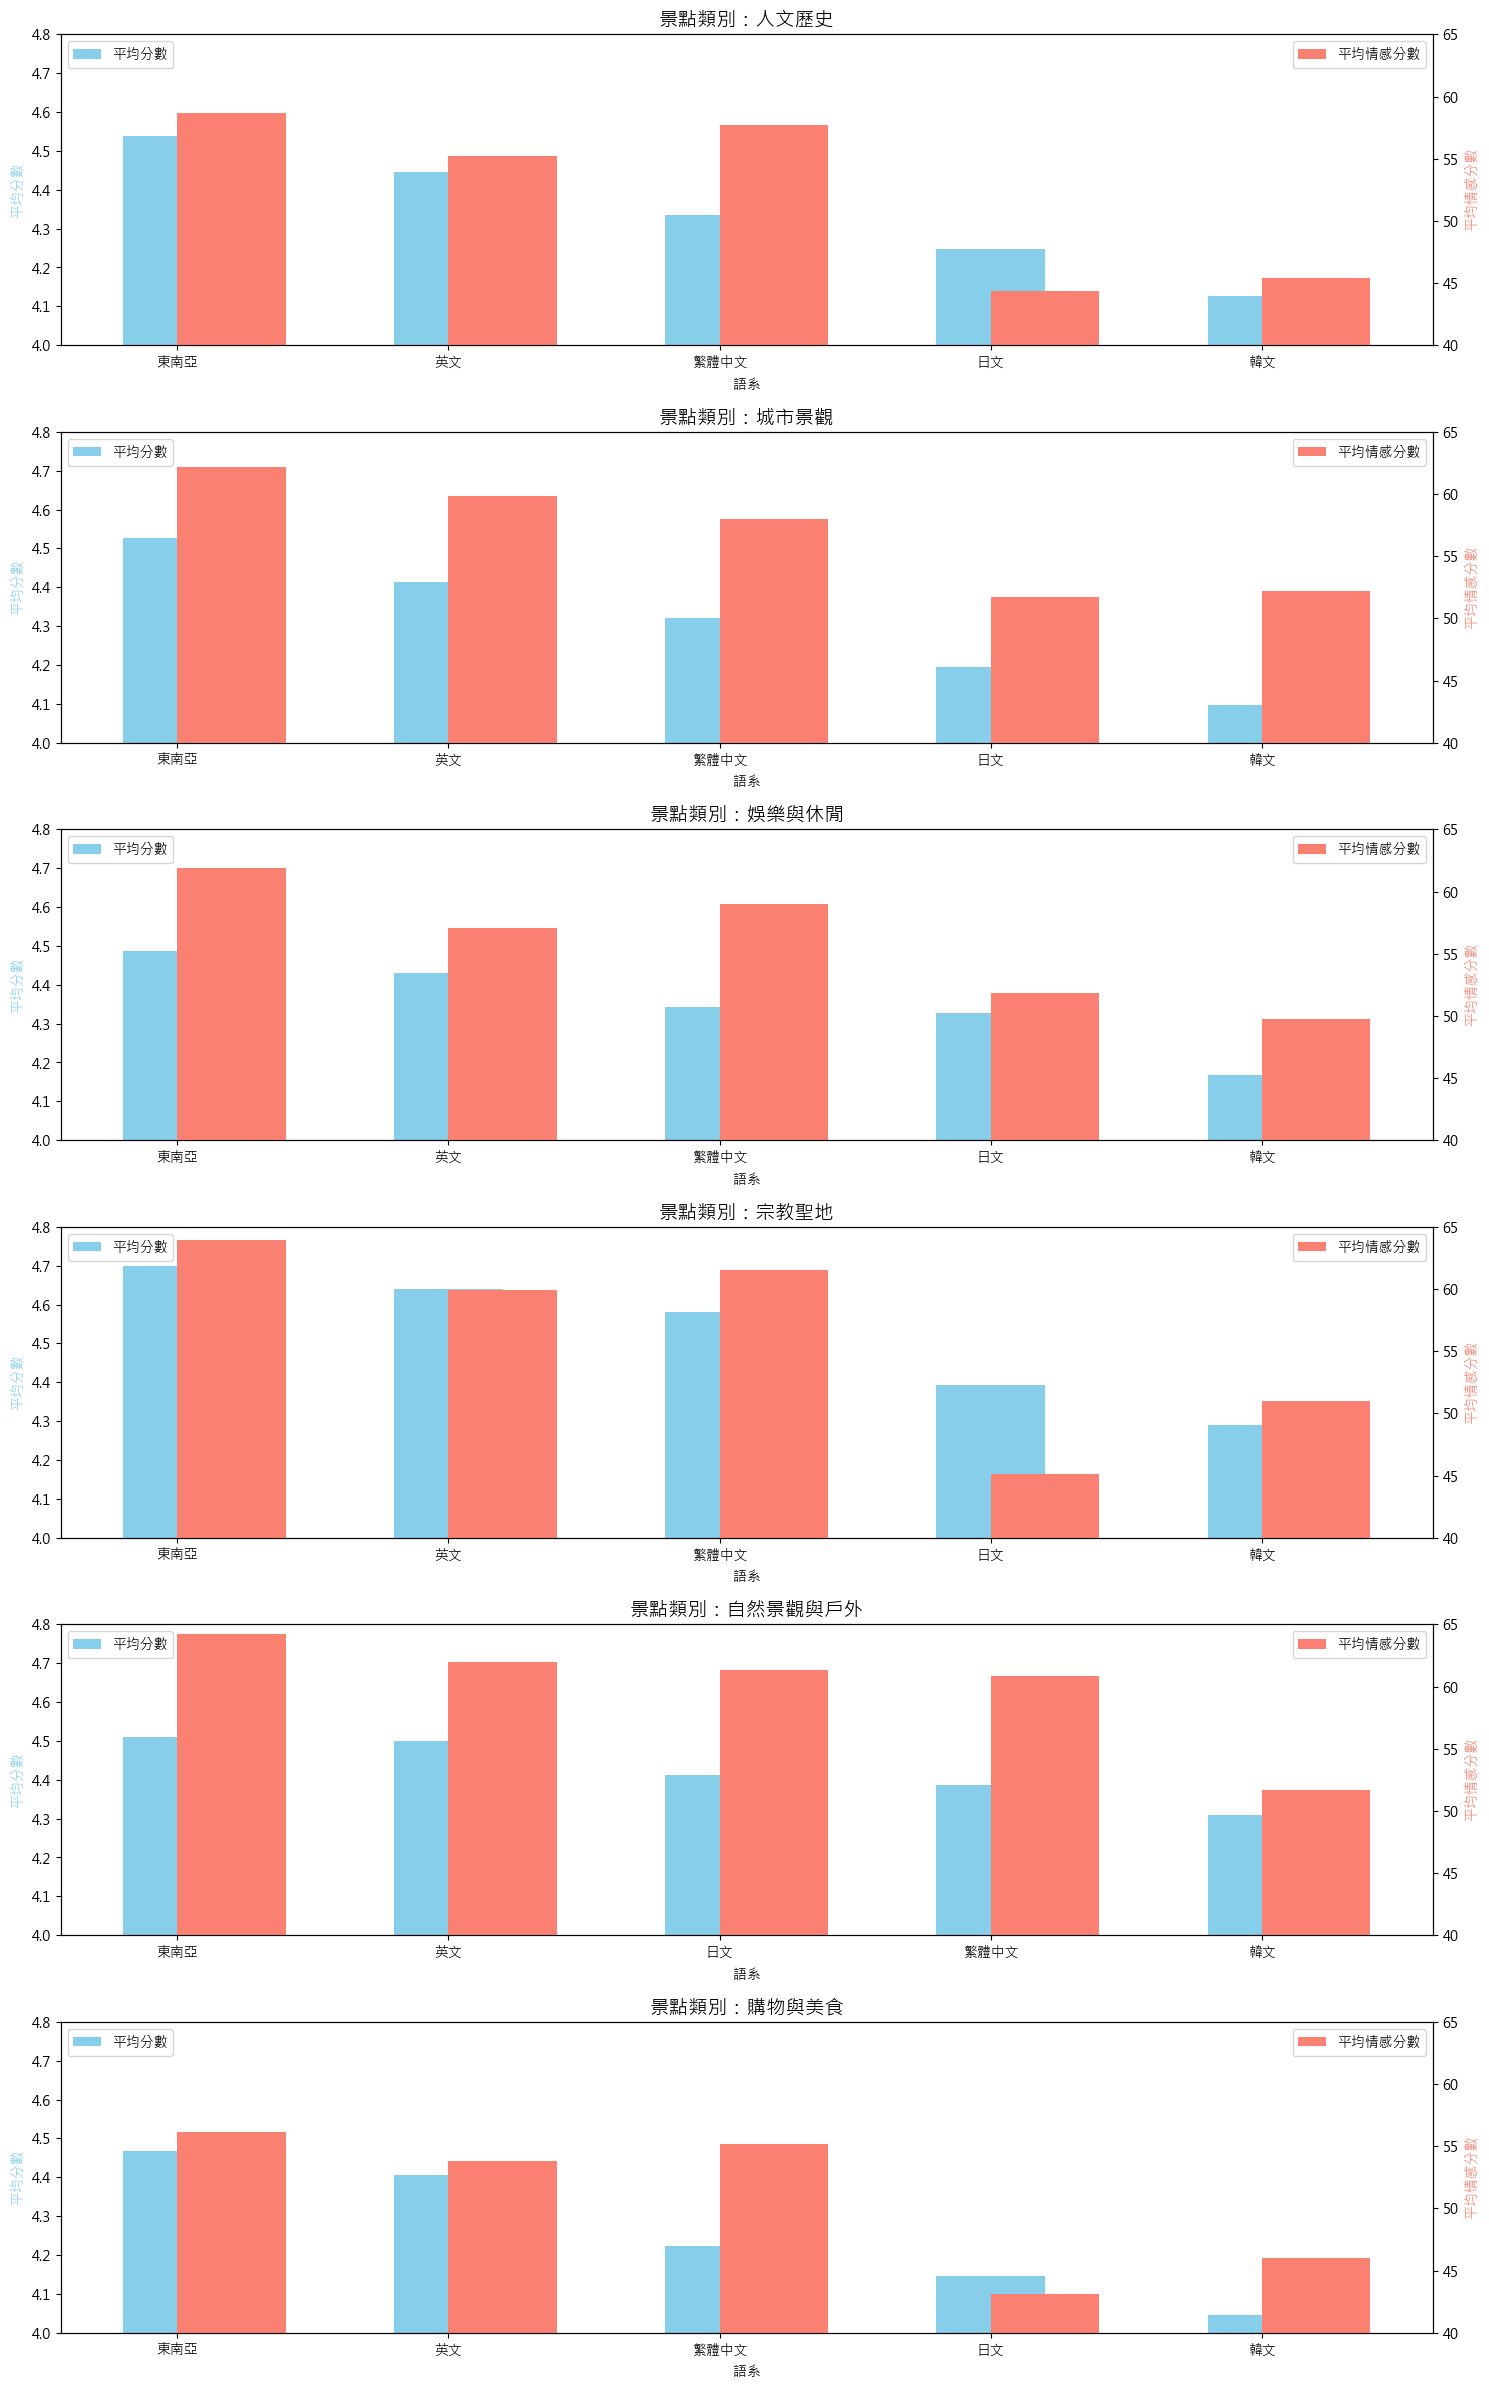

In [25]:
# 獲取地點類別
categories = top_type_per_nation_merged["attraction_type"].unique()
num_categories = len(categories)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_categories, ncols=1, figsize=(15, 4 * num_categories))

# 繪製每個地點類別的圖
for ax, category in zip(axes, categories):
    df_category = top_type_per_nation_merged[top_type_per_nation_merged["attraction_type"] == category].sort_values('score',ascending=False)

    # 設定 X 軸標籤的位置（讓兩個長條並排）
    x_indexes = np.arange(len(df_category))

    color = "skyblue"
    # 繪製「平均分數」的長條圖（左側 Y 軸）
    ax.bar(
        x_indexes,  # 往左偏移
        df_category["score"],
        width=0.4,
        label="平均分數",
        color=color,
        align = "center"
    )
    ax.set_title(f"景點類別：{category}", fontsize=14) 
    ax.set_xlabel("語系") 
    ax.set_ylabel("平均分數", color=color)

    # 創建第二個 Y 軸 (右 Y 軸)
    ax2 = ax.twinx()

    color = "salmon"
    # 繪製「平均情感分數」的長條圖（右 Y 軸）
    ax2.bar(
        x_indexes,
        df_category["snownlp_scores_0-100"],
        width=0.4,
        label="平均情感分數",
        color=color,
        align = "edge"
    )

    # 設定標題與 X/Y 軸標籤
    ax2.set_ylabel("平均情感分數", color=color)  

    # 設定 X 軸刻度標籤
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(df_category["language"], rotation=0)

    # 設定 Y 軸範圍
    ax.set_ylim(4.0, 4.8)
    ax2.set_ylim(40, 65)

    # 顯示圖例
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# 調整子圖間距
plt.tight_layout()
plt.show()

### 依語系並列評分與情感分數

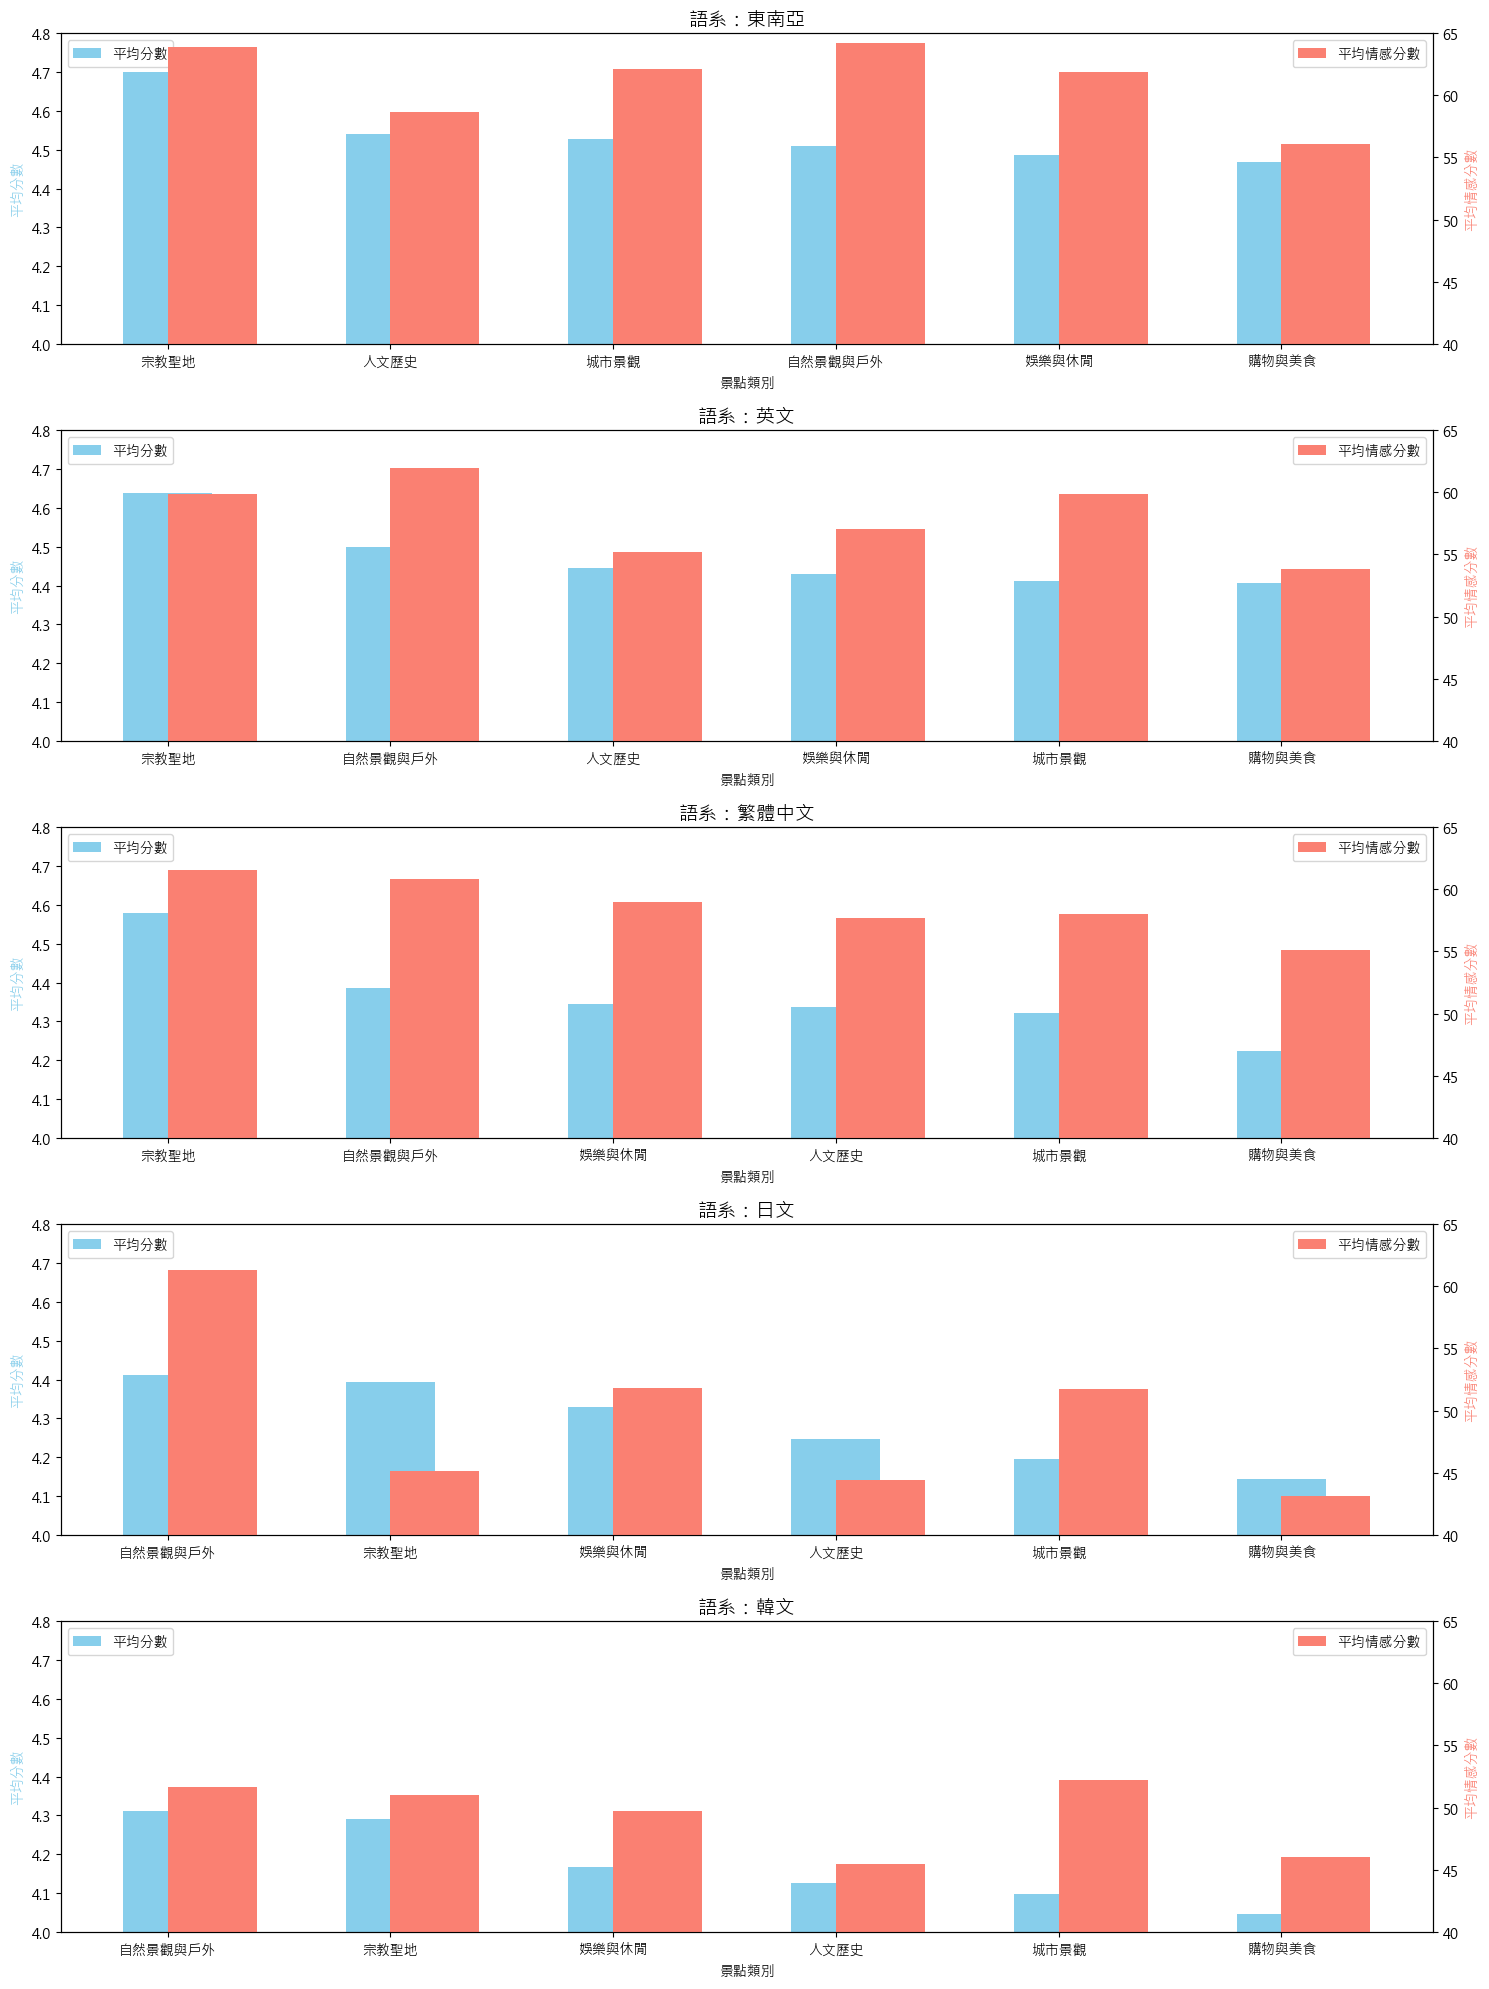

In [26]:
# 獲取語系
languages = top_type_per_nation_merged["language"].unique()
num_languages = len(languages)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 4 * num_languages))

# 繪製每個地點類別的圖
for ax, language in zip(axes, languages):
    df_language = top_type_per_nation_merged[top_type_per_nation_merged["language"] == language].sort_values('score',ascending=False)

    # 設定 X 軸標籤的位置（讓兩個長條並排）
    x_indexes = np.arange(len(df_language))

    color = "skyblue"
    # 繪製「平均分數」的長條圖（左側 Y 軸）
    ax.bar(
        x_indexes,  # 往左偏移
        df_language["score"],
        width=0.4,
        label="平均分數",
        color=color,
        align = "center"
    )
    ax.set_title(f"語系：{language}", fontsize=14) 
    ax.set_xlabel("景點類別") 
    ax.set_ylabel("平均分數", color=color)

    # 創建第二個 Y 軸 (右 Y 軸)
    ax2 = ax.twinx()

    color = "salmon"
    # 繪製「平均情感分數」的長條圖（右 Y 軸）
    ax2.bar(
        x_indexes,
        df_language["snownlp_scores_0-100"],
        width=0.4,
        label="平均情感分數",
        color=color,
        align = "edge"
    )

    # 設定標題與 X/Y 軸標籤

    ax2.set_ylabel("平均情感分數", color=color)  

    # 設定 X 軸刻度標籤
    ax.set_xticks(x_indexes)
    ax.set_xticklabels(df_language["attraction_type"], rotation=0)  # 旋轉標籤避免重疊

    # 設定 Y 軸範圍
    ax.set_ylim(4.0, 4.8)
    ax2.set_ylim(40, 65)  # 依據「情感分數」的範圍調整

    # 顯示圖例
    ax.legend(loc="upper left")
    ax2.legend(loc="upper right")

# 調整子圖間距
plt.tight_layout()
plt.show()

### 各語系各縣市景點評論數量

In [27]:
# 縣市與語系的評論數量樞紐分析
city_counts = new_basic_info_rating_838.pivot_table('score', index='address', columns='language', aggfunc='count')
city_counts

language,日文,東南亞,繁體中文,英文,韓文
address,,,,,
南投縣,660,1263,131656,6052,365
台中市,2000,2036,194757,12127,1683
台北市,14490,6974,362557,56087,19693
台南市,2010,965,184459,7337,943
台東縣,756,145,105996,2905,149
嘉義市,308,243,44037,1426,44
嘉義縣,410,490,81970,2826,149
基隆市,581,413,63048,2568,209
宜蘭縣,472,213,98495,2824,164


In [28]:
# 進行標準化
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()

city_counts_standardized = city_counts.copy()
for column in city_counts.columns:
    city_counts_standardized[column] = scaler.fit_transform(city_counts[[column]])

city_counts_standardized = city_counts_standardized.sort_values("繁體中文", ascending= False)
city_counts_standardized

language,日文,東南亞,繁體中文,英文,韓文
address,,,,,
台北市,3.912963,3.666852,2.951351,4.062710,3.341537
新北市,2.027439,2.090452,1.913775,1.553757,2.890884
台中市,0.105947,0.642664,0.972905,0.433678,-0.075830
高雄市,0.247072,0.569172,0.941224,0.391988,0.321123
台南市,0.108996,-0.013251,0.851487,0.038248,-0.216244
桃園市,-0.360709,-0.092867,0.234879,-0.294441,-0.382653
南投縣,-0.302491,0.169254,0.228913,-0.067832,-0.325919
花蓮縣,-0.253113,-0.424193,0.008478,-0.213043,-0.301821
台東縣,-0.273230,-0.515445,-0.073631,-0.327627,-0.366904


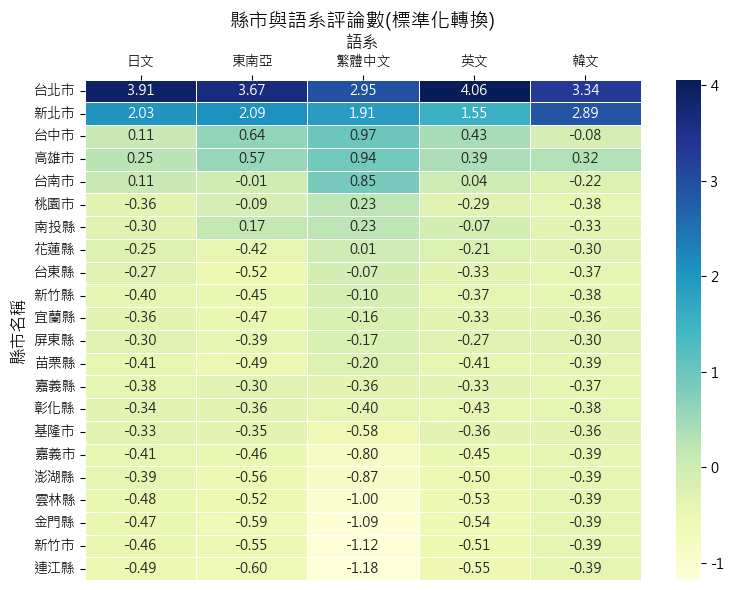

In [29]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_counts_standardized.round(2), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("縣市與語系評論數(標準化轉換)",fontsize=14)
plt.ylabel("縣市名稱",fontsize=12)
plt.xlabel("語系",fontsize=12)
plt.tight_layout()
plt.show()

### 各語系前n名留言數縣市

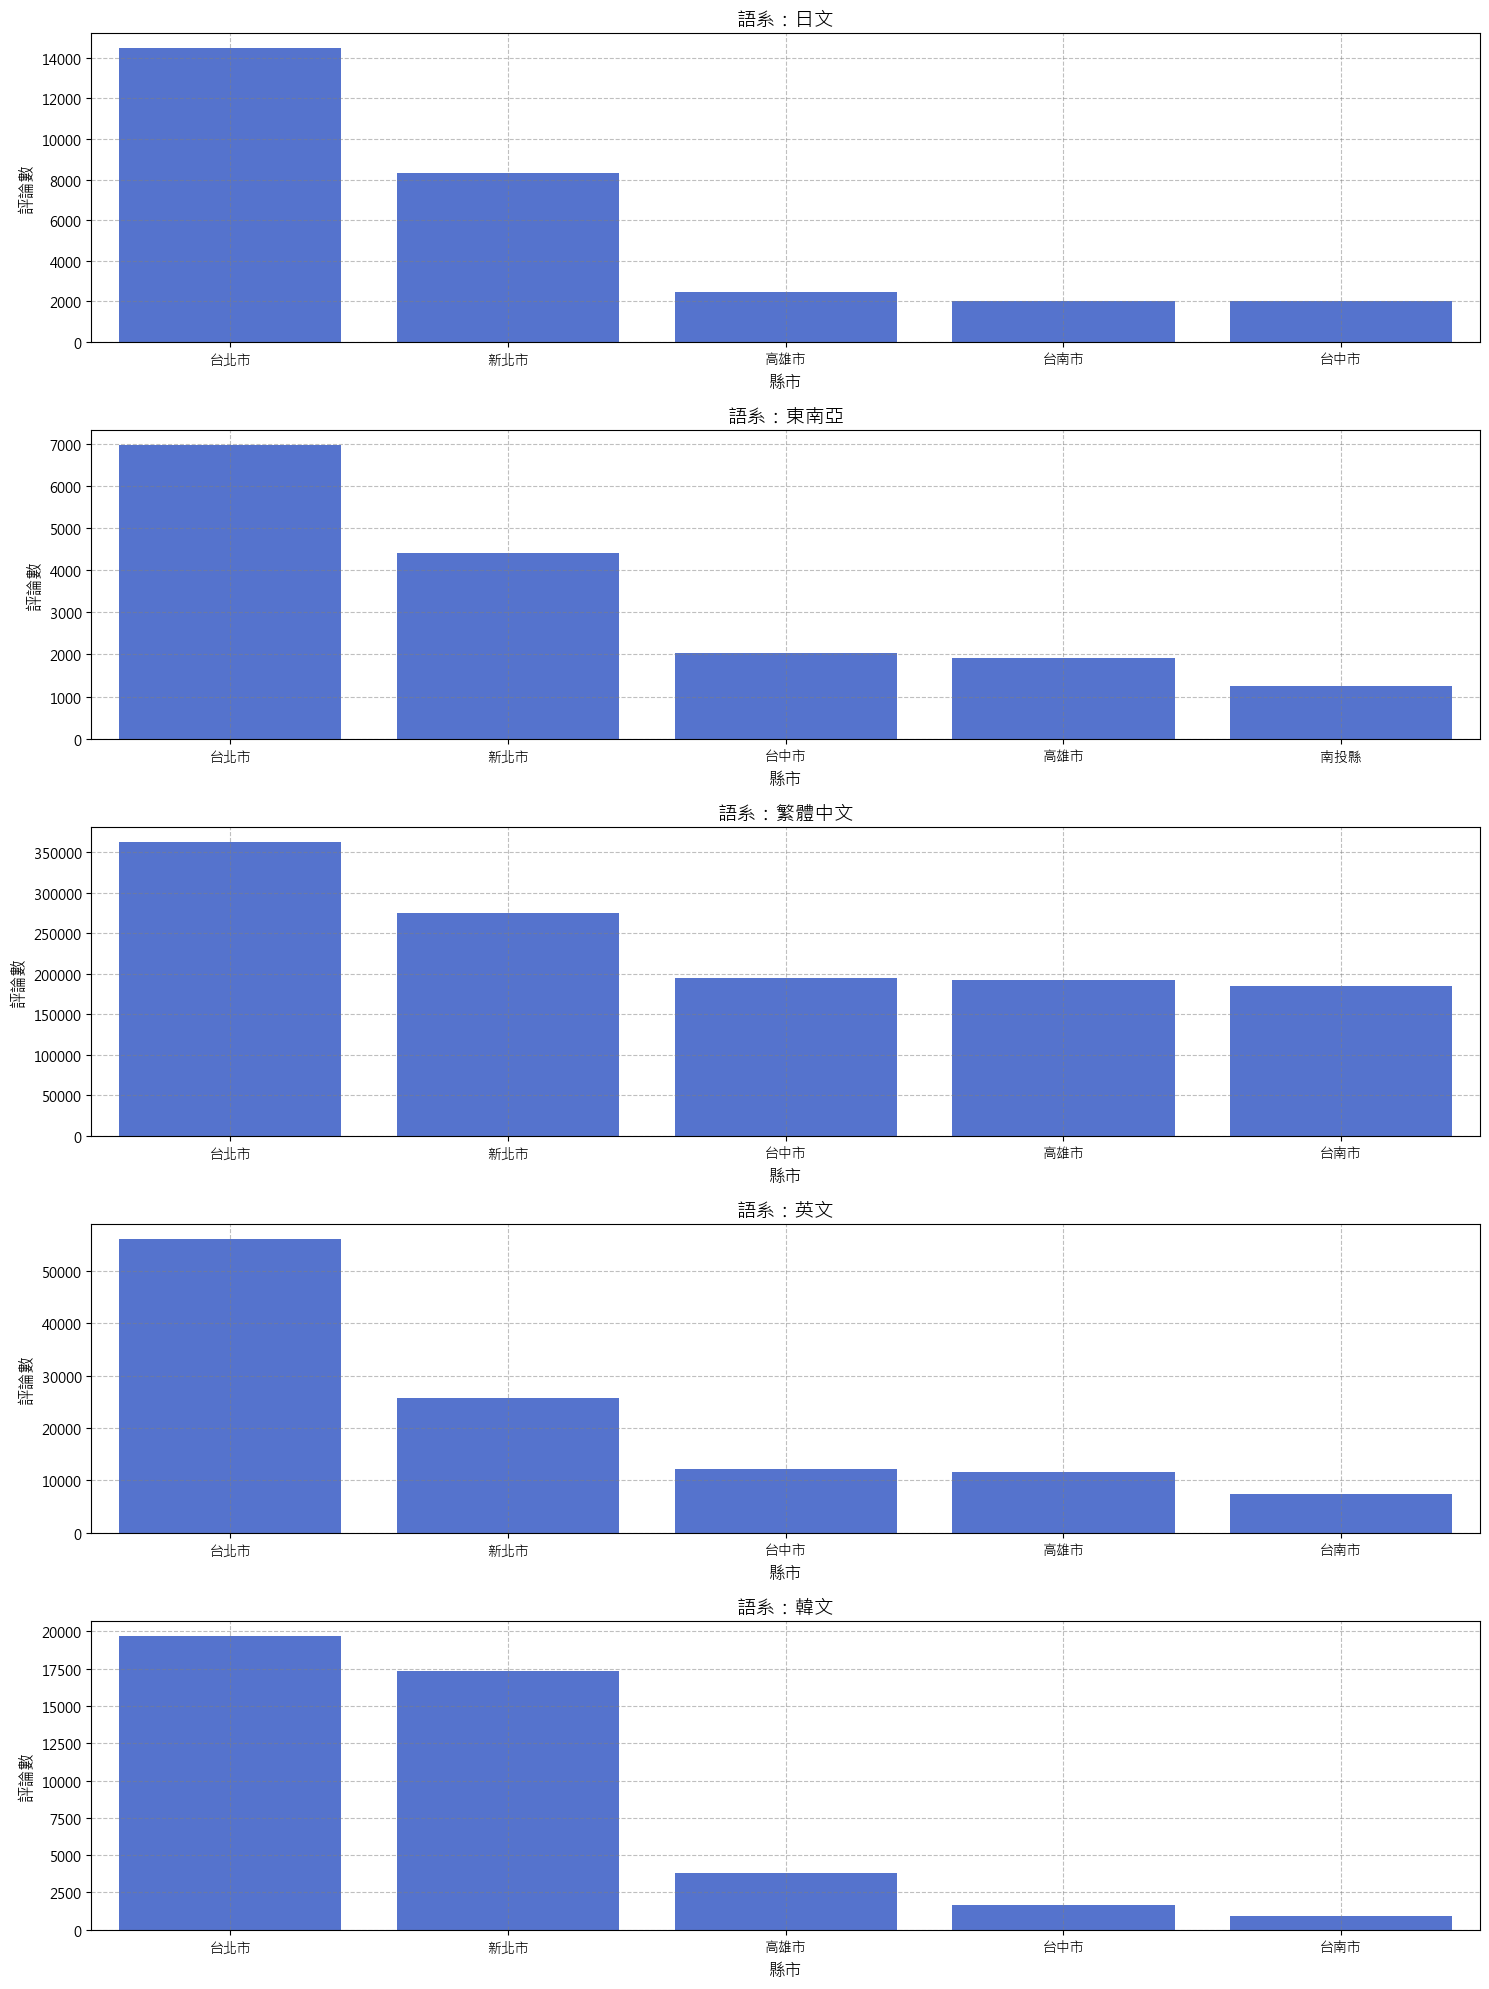

In [30]:
# 使用子圖的方式

# 前 n 名
n = 5

# 國籍數量
languages = city_counts.columns
num_languages = len(languages)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 4 * num_languages))

# 繪製每個語系的圖
for ax, language in zip(axes, languages):

    # 篩選出每個語系前n多的縣市評論數的數據
    df_language = city_counts[city_counts[language] >= city_counts[language].nlargest(n).min()].sort_values(language,ascending=False)

    sns.barplot(
        data=df_language,
        x="address",
        y=f"{language}",
        ax=ax,
        ci=None,
        color='royalblue'
    )
    ax.set_title(f"語系：{language}", fontsize=14) 
    ax.set_xlabel("縣市", fontsize=12) 
    ax.set_ylabel("評論數", fontsize=12) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
    ax.grid(linestyle='--',color='gray', alpha=0.5)

# 調整子圖間距
plt.tight_layout()
plt.show()

## 語系與類別評論數量

### 各語系各類別景點評論數量

In [31]:
# 縣市與語系的評論數量樞紐分析
city_groups = new_basic_info_rating_838.pivot_table('score', index='attraction_type', columns='language', aggfunc='count').sort_values('繁體中文',ascending=False)
city_groups

language,日文,東南亞,繁體中文,英文,韓文
attraction_type,,,,,
人文歷史,17171,7529,799916,57927,24704
自然景觀與戶外,5410,5108,667609,30662,7047
娛樂與休閒,1854,2037,401587,14724,2040
購物與美食,5168,2509,246896,24236,6304
城市景觀,3574,2425,218788,16515,3103
宗教聖地,3176,2098,134505,7157,2620


In [32]:
# 進行標準化
from sklearn.preprocessing import StandardScaler

# 標準化
scaler = StandardScaler()

city_groups_standardized = city_groups.copy()
for column in city_groups.columns:
    city_groups_standardized[column] = scaler.fit_transform(city_groups[[column]])

city_groups_standardized

language,日文,東南亞,繁體中文,英文,韓文
attraction_type,,,,,
人文歷史,2.173289,1.916955,1.590996,1.996087,2.172093
自然景觀與戶外,-0.126897,0.730416,1.048982,0.332961,-0.075001
娛樂與休閒,-0.822371,-0.774689,-0.040816,-0.639235,-0.712209
購物與美食,-0.174227,-0.543361,-0.674529,-0.059016,-0.169558
城市景觀,-0.485977,-0.584529,-0.789678,-0.529986,-0.576928
宗教聖地,-0.563817,-0.744793,-1.134955,-1.100811,-0.638397


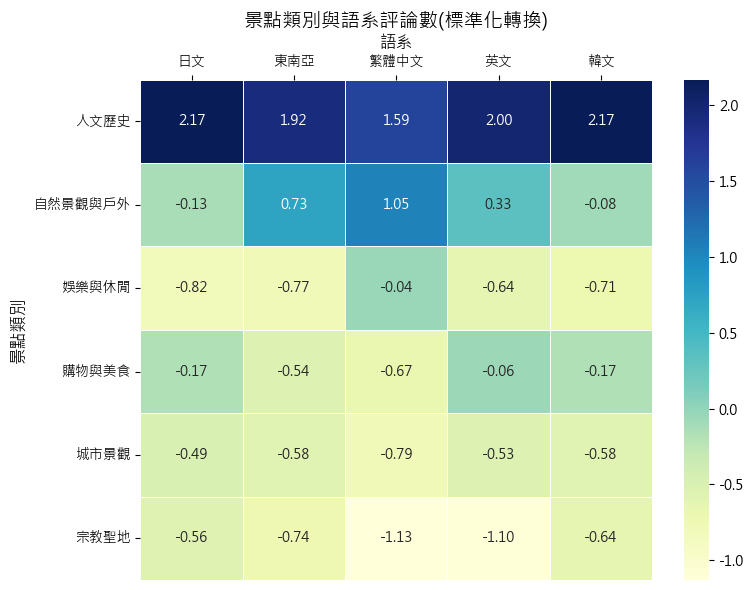

In [33]:
# 繪製熱力圖
plt.figure(figsize=(8, 6))
ax = sns.heatmap(city_groups_standardized.round(2), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5)

# 讓類別名稱標籤出現在上方
ax.xaxis.set_label_position("top")
ax.xaxis.tick_top()

plt.xticks(rotation=0)
plt.title("景點類別與語系評論數(標準化轉換)",fontsize=14)
plt.ylabel("景點類別",fontsize=12)
plt.xlabel("語系",fontsize=12)
plt.tight_layout()
plt.show()

### 景點類別評論數依語系畫子圖

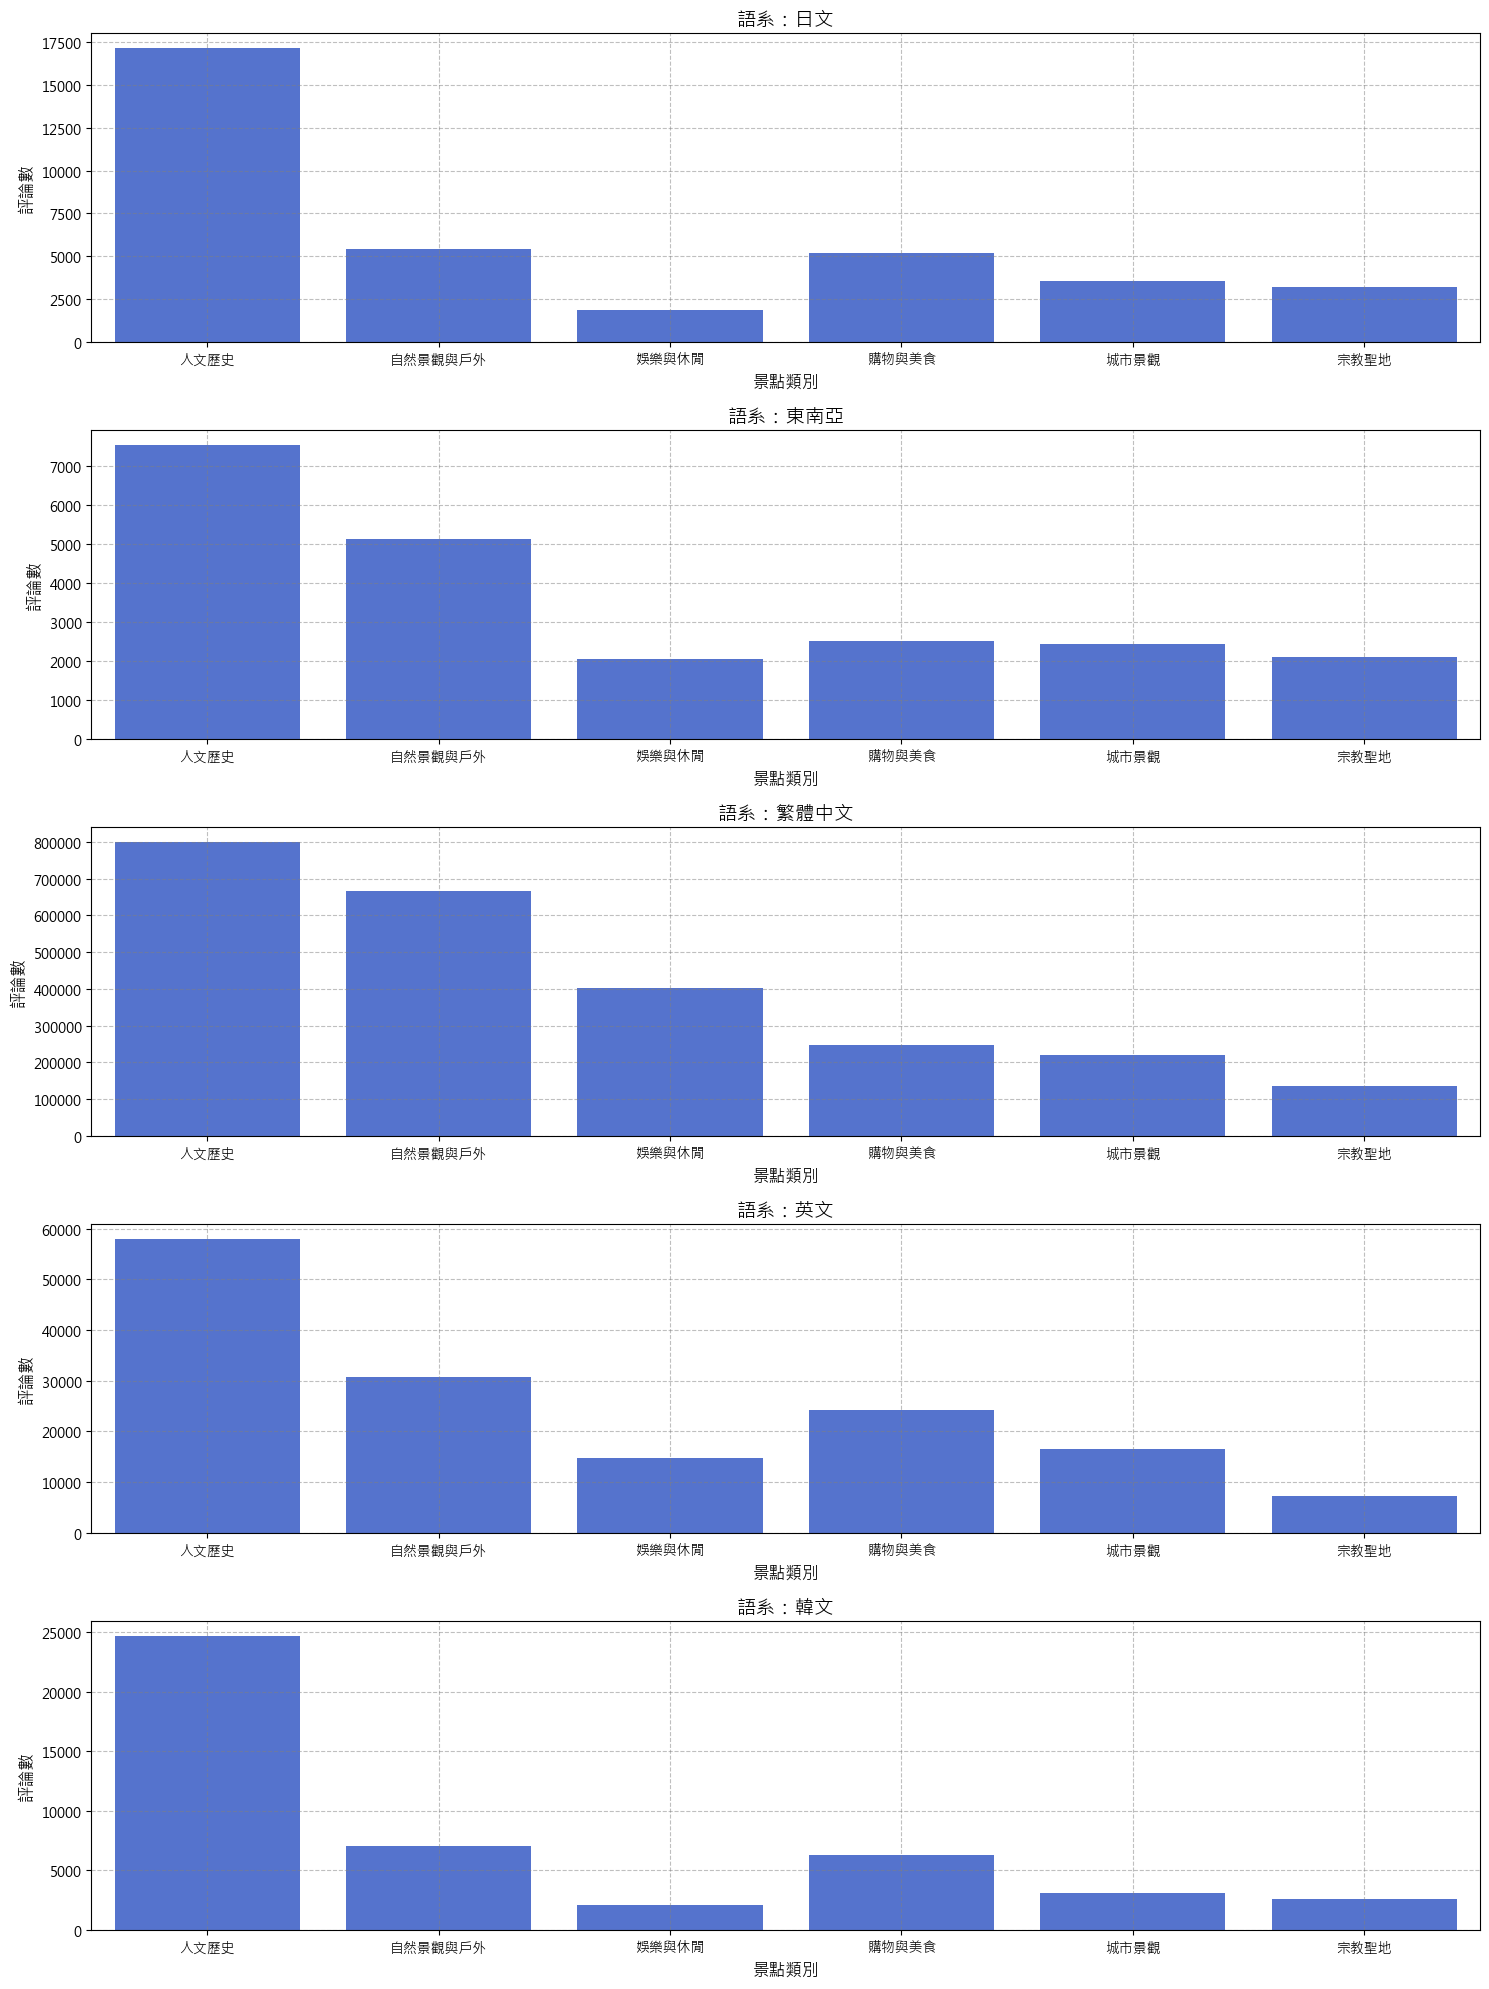

In [34]:
# 國籍數量
languages = city_groups.columns
num_languages = len(languages)

# 設定子圖的行數與列數
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 4 * num_languages))

# 繪製每個語系的圖
for ax, language in zip(axes, languages):

    sns.barplot(
        data=city_groups,
        x="attraction_type",
        y=f"{language}",
        ax=ax,
        ci=None,
        color='royalblue'
    )
    ax.set_title(f"語系：{language}", fontsize=14) 
    ax.set_xlabel("景點類別", fontsize=12) 
    ax.set_ylabel("評論數", fontsize=12) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0) 
    ax.grid(linestyle='--',color='gray', alpha=0.5)

# 調整子圖間距
plt.tight_layout()
plt.show()

## 語系與各景點評論數量

### 各語系各景點評論數量

In [35]:
# 各語系各景點評分數量樞紐分析
nationality_location_counts = new_basic_info_rating_838.pivot_table('score', index='gmap_location', columns='language', aggfunc='count')
nationality_location_counts

language,日文,東南亞,繁體中文,英文,韓文
gmap_location,,,,,
8大森林樂園,1.0,NaN,936.0,10.0,NaN
921地震教育園區,25.0,13.0,4645.0,342.0,15.0
9420濱海公園,1.0,1.0,388.0,8.0,NaN
The One南園人文客棧,3.0,1.0,1155.0,52.0,1.0
一貫道寶光建德神威天臺山道場,7.0,7.0,1339.0,14.0,NaN
...,...,...,...,...,...
龍磐公園,82.0,18.0,4843.0,277.0,159.0
龍門露營渡假基地－新北(露營區，北部露營區 ，親子露營區 ，度假露營區休閒露營區，小木屋露營區推薦 ),1.0,2.0,659.0,26.0,1.0
龍騰斷橋(魚藤坪斷橋),67.0,25.0,9015.0,262.0,5.0


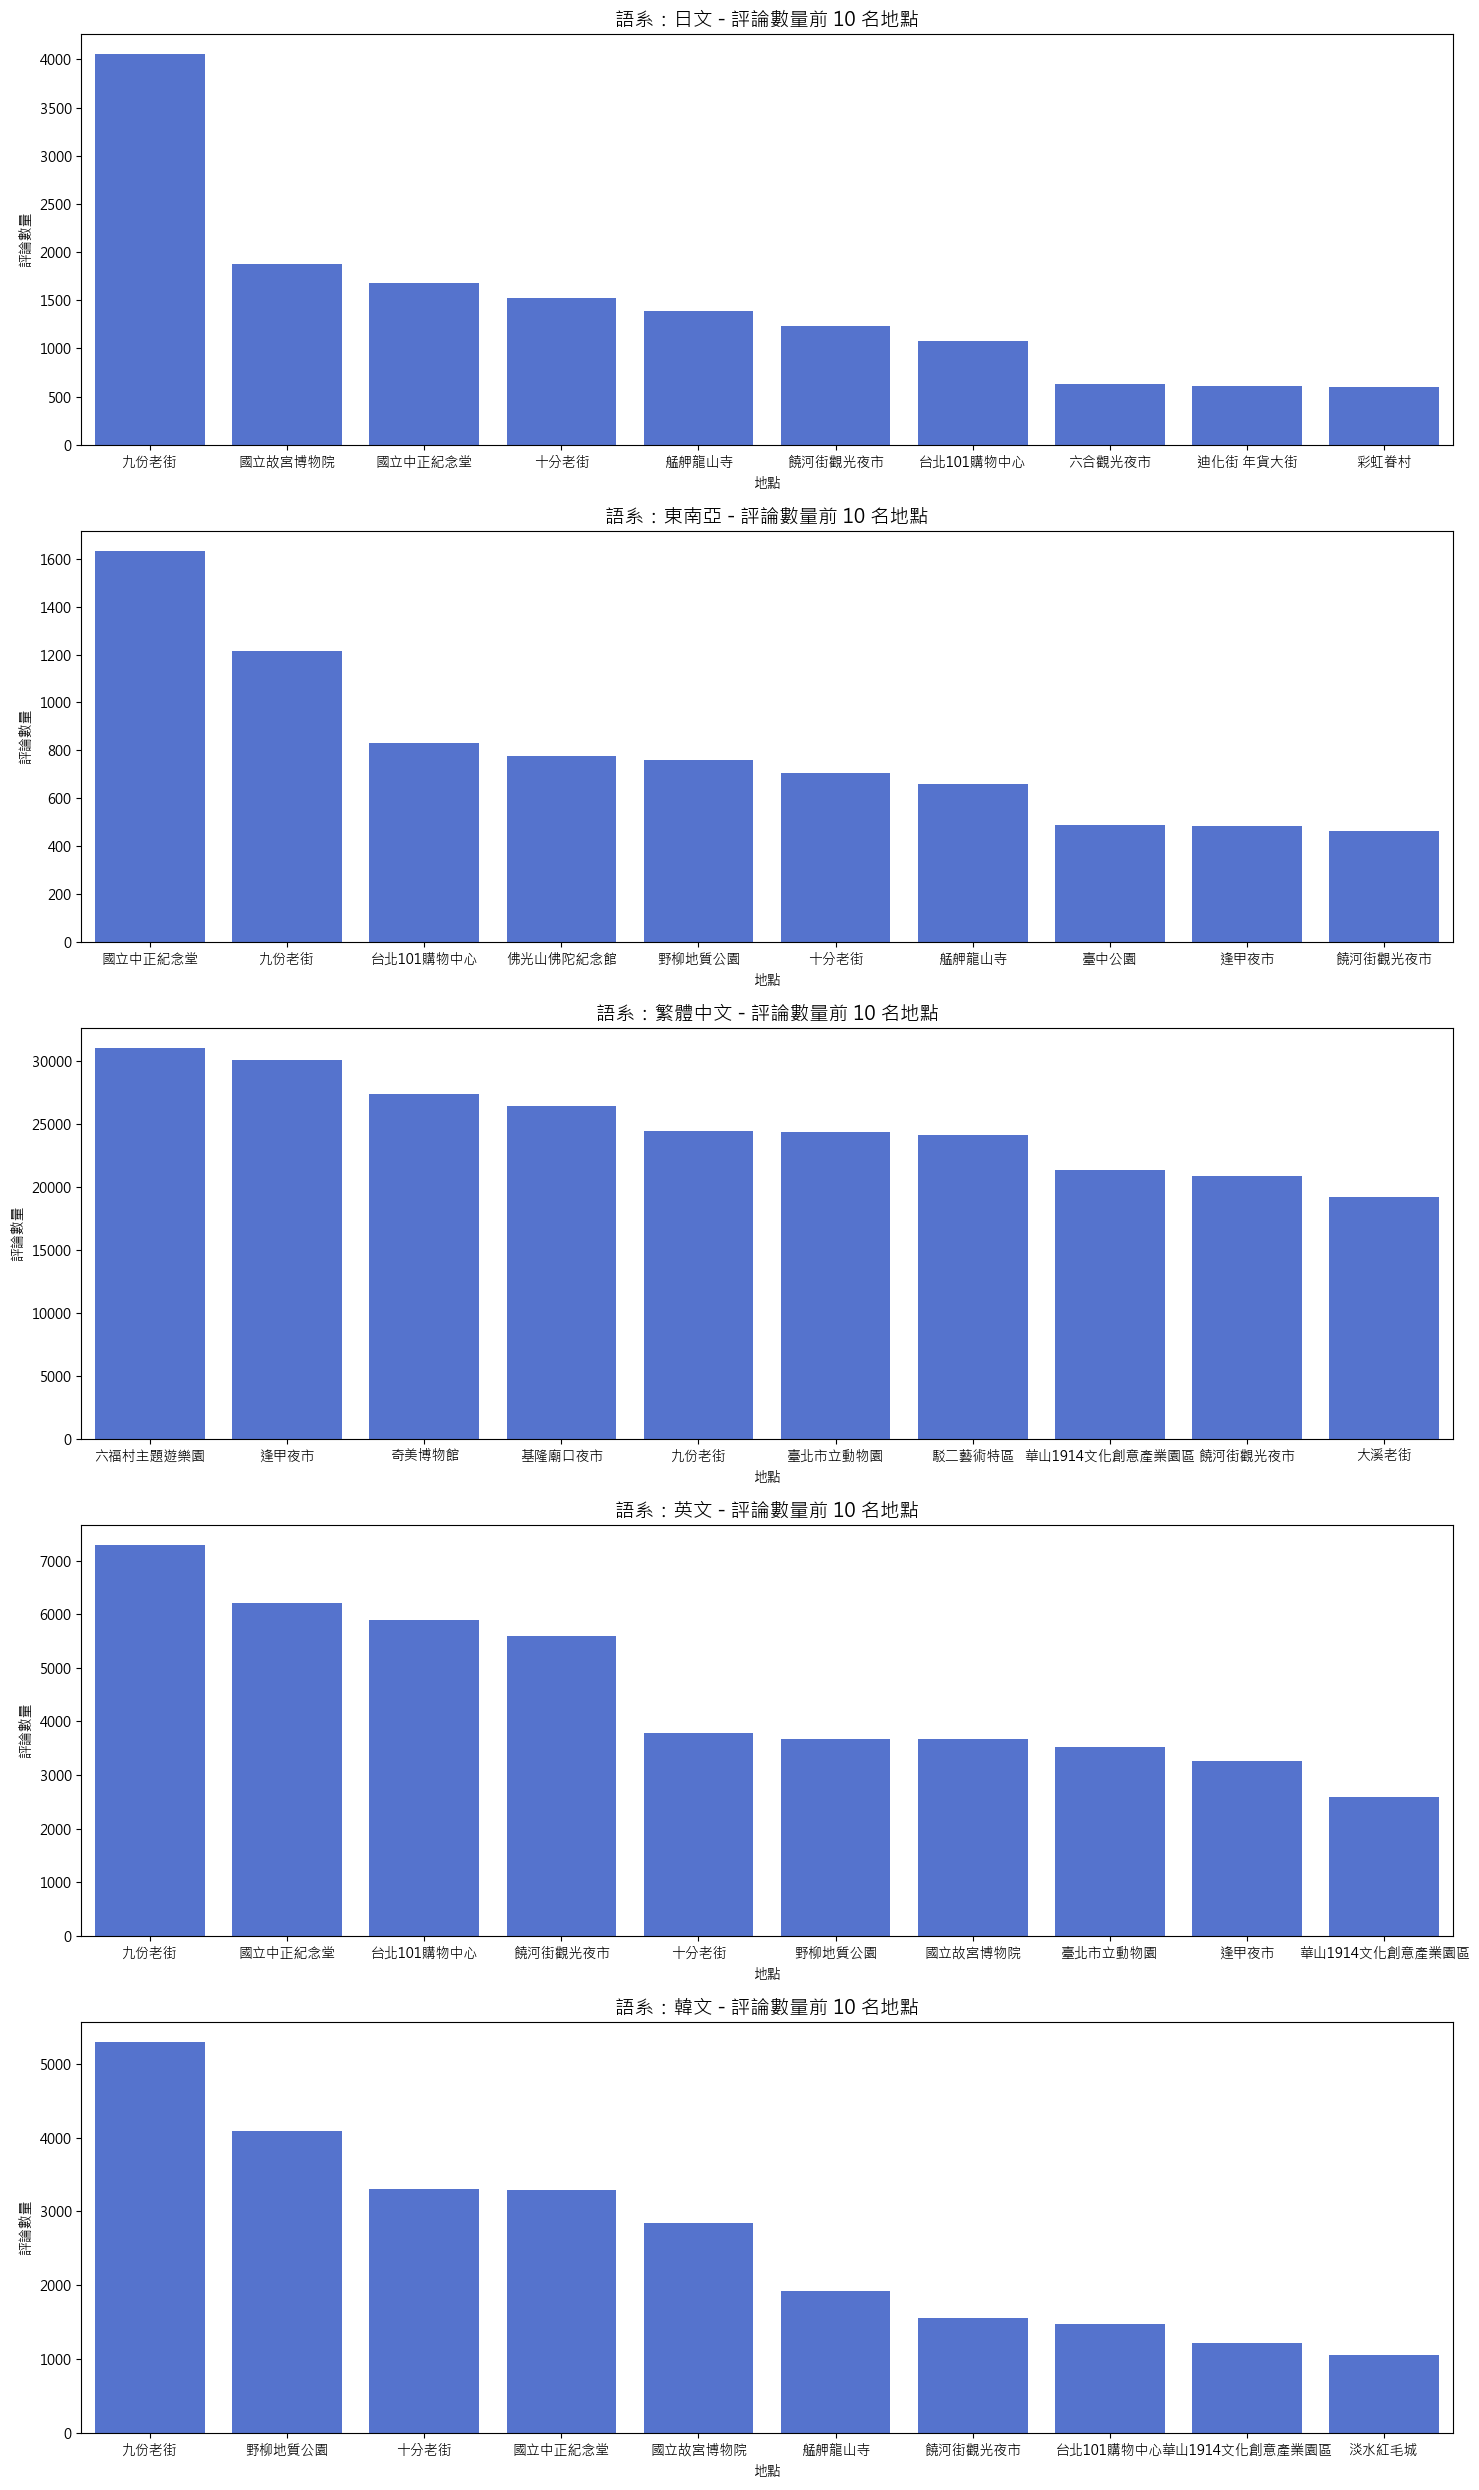

In [36]:
# 取得所有語系
languages = nationality_location_counts.columns

# 設定子圖的行數與列數 (您可以根據語系數量調整)
num_languages = len(languages)
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 5 * num_languages))

# 繪製每個語系的圖
for ax, language in zip(axes, languages):
    # 取得該語系的評論數量並排序
    top_10_locations = nationality_location_counts[language].nlargest(10)

    # 繪製長條圖
    sns.barplot(
        x=top_10_locations.index,
        y=top_10_locations.values,
        ax=ax,
        color="royalblue"
    )

    # 設定子圖樣式
    ax.set_title(f"語系：{language} - 評論數量前 10 名地點", fontsize=14)
    ax.set_xlabel("地點")
    ax.set_ylabel("評論數量")
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

### 找出各語系評論數前n名的地點交集

language            日文     東南亞     繁體中文      英文      韓文 average_count
九份老街            4057.0  1214.0  24443.0  7296.0  5297.0        8461.4
逢甲夜市             280.0   482.0  30063.0  3253.0   475.0        6910.6
饒河街觀光夜市         1235.0   463.0  20893.0  5602.0  1556.0        5949.8
臺北市立動物園          456.0   305.0  24397.0  3520.0   590.0        5853.6
國立中正紀念堂         1682.0  1633.0  15490.0  6210.0  3288.0        5660.6
華山1914文化創意產業園區   376.0   209.0  21382.0  2593.0  1212.0        5154.4


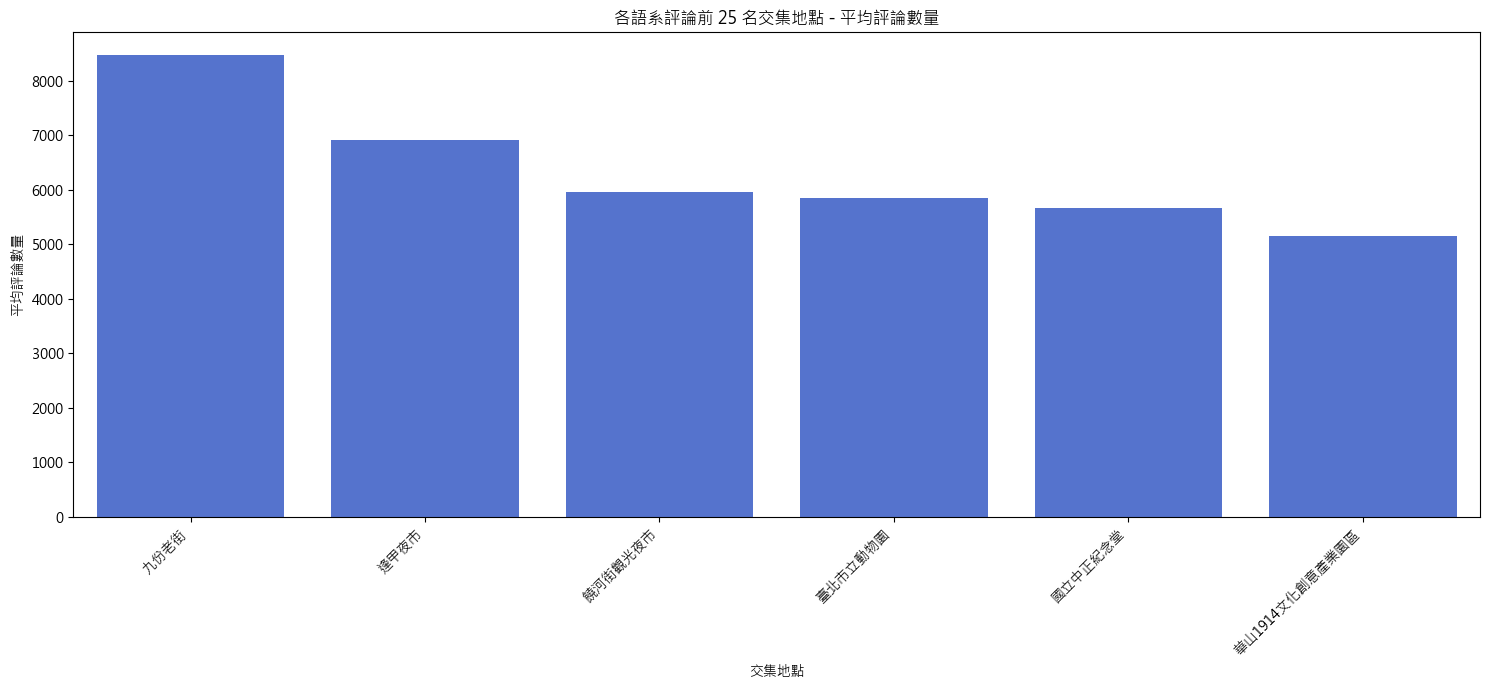

In [37]:
# 儲存每個語系的前 n 名地點
n = 25

# 取得所有語系
languages = nationality_location_counts.columns

top_locations_counts = {}
for language in languages:
    top_locations_counts[language] = nationality_location_counts[language].nlargest(n).index.tolist()

# 找出交集地點
intersected_locations = set(top_locations_counts[languages[0]])
for language in languages[1:]:
    intersected_locations = intersected_locations.intersection(set(top_locations_counts[language]))

# 將交集地點轉換為列表
intersected_locations_list = list(intersected_locations)

# 計算交集地點的平均評論數量
intersected_data = pd.DataFrame(index=intersected_locations_list, columns=languages)
for location in intersected_locations_list:
    for language in languages:
        intersected_data.loc[location, language] = nationality_location_counts.loc[location, language]

# 計算平均評論數量
intersected_data['average_count'] = intersected_data.mean(axis=1)

# 繪製長條圖
plt.figure(figsize=(15, 7))
sns.barplot(
    x=intersected_data['average_count'].sort_values(ascending=False).index,
    y=intersected_data['average_count'].sort_values(ascending=False),
    color="royalblue"
)

instersected_data_with_taiwan = intersected_data.sort_values('average_count',ascending=False)
print(instersected_data_with_taiwan)

# 設定圖表樣式
plt.title(f"各語系評論前 {n} 名交集地點 - 平均評論數量")
plt.xlabel("交集地點")
plt.ylabel("平均評論數量")
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

language            日文     東南亞      英文      韓文 average_count
九份老街            4057.0  1214.0  7296.0  5297.0        4466.0
國立中正紀念堂         1682.0  1633.0  6210.0  3288.0       3203.25
十分老街            1526.0   705.0  3793.0  3299.0       2330.75
台北101購物中心       1075.0   830.0  5895.0  1467.0       2316.75
野柳地質公園           407.0   760.0  3681.0  4084.0        2233.0
饒河街觀光夜市         1235.0   463.0  5602.0  1556.0        2214.0
國立故宮博物院         1879.0   375.0  3668.0  2840.0        2190.5
艋舺龍山寺           1387.0   659.0  1916.0  1915.0       1469.25
臺北市立動物園          456.0   305.0  3520.0   590.0       1217.75
逢甲夜市             280.0   482.0  3253.0   475.0        1122.5
華山1914文化創意產業園區   376.0   209.0  2593.0  1212.0        1097.5
六合觀光夜市           631.0   294.0  1532.0   931.0         847.0
彩虹眷村             601.0   355.0  2001.0   343.0         825.0


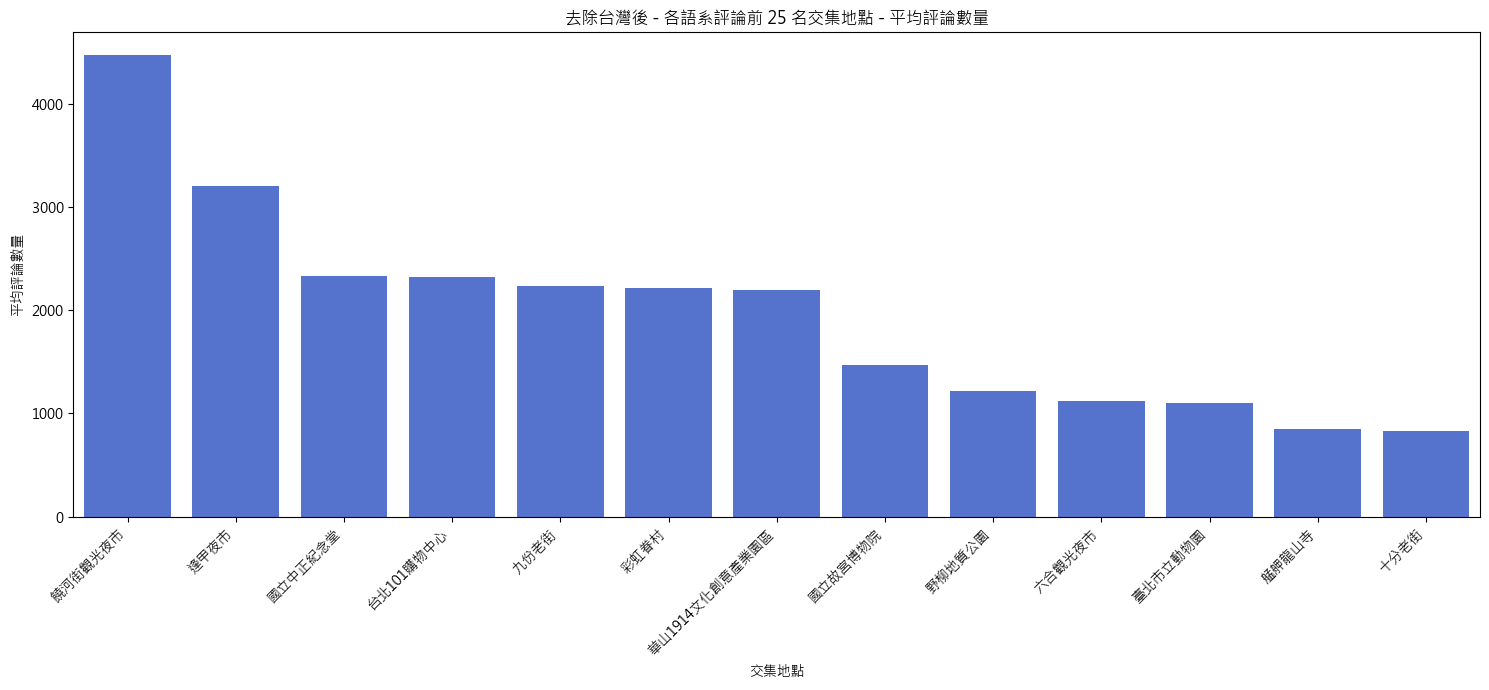

In [38]:
# 去除繁體中文之後的各語系前n評論點交集
nationality_location_counts_no_taiwan = nationality_location_counts.drop(columns="繁體中文")

# 取得所有語系
languages = nationality_location_counts_no_taiwan.columns

# 儲存每個語系的前 n 名地點
top_n_locations_counts_no_taiwan = {}
for language in languages:
    top_n_locations_counts_no_taiwan[language] = nationality_location_counts_no_taiwan[language].nlargest(n).index.tolist()

# 找出交集地點
intersected_locations = set(top_n_locations_counts_no_taiwan[languages[0]])
for language in languages[1:]:
    intersected_locations = intersected_locations.intersection(set(top_n_locations_counts_no_taiwan[language]))

# 將交集地點轉換為列表
intersected_locations_list_no_taiwan = list(intersected_locations)

# 計算交集地點的平均評論數量
intersected_data = pd.DataFrame(index=intersected_locations_list_no_taiwan, columns=languages)
for location in intersected_locations_list_no_taiwan:
    for language in languages:
        intersected_data.loc[location, language] = nationality_location_counts_no_taiwan.loc[location, language]

# 計算平均評論數量
intersected_data['average_count'] = intersected_data.mean(axis=1)

# 繪製長條圖
plt.figure(figsize=(15, 7))
sns.barplot(
    x=intersected_data.index,
    y=intersected_data['average_count'].sort_values(ascending=False),
    color="royalblue"
)

instersected_data_no_taiwan = intersected_data.sort_values('average_count',ascending=False)
print(instersected_data_no_taiwan)

# 設定圖表樣式
plt.title(f"去除台灣後 - 各語系評論前 {n} 名交集地點 - 平均評論數量")
plt.xlabel("交集地點")
plt.ylabel("平均評論數量")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

### 與繁體中文不同評論數前n名的景點交集

In [39]:
# 找出有在各語系前n名交集中 但沒有在繁體中文前n名的景點
for i in range(25, 101, 25):
    # 儲存每個語系的前 n 名地點
    n = i

    # 取得所有語系
    languages = nationality_location_counts.columns

    top_locations_counts = {}
    for language in languages:
        top_locations_counts[language] = nationality_location_counts[language].nlargest(n).index.tolist()

    # 找出交集地點
    intersected_locations = set(top_locations_counts[languages[0]])
    for language in languages[1:]:
        intersected_locations = intersected_locations.intersection(set(top_locations_counts[language]))

    # 將交集地點轉換為列表
    intersected_locations_list = list(intersected_locations)

    # 取得所有語系
    languages = nationality_location_counts_no_taiwan.columns

    # 儲存每個語系的前 n 名地點
    top_n_locations_counts_no_taiwan = {}
    for language in languages:
        top_n_locations_counts_no_taiwan[language] = nationality_location_counts_no_taiwan[language].nlargest(n).index.tolist()

    # 找出交集地點
    intersected_locations = set(top_n_locations_counts_no_taiwan[languages[0]])
    for language in languages[1:]:
        intersected_locations = intersected_locations.intersection(set(top_n_locations_counts_no_taiwan[language]))

    # 將交集地點轉換為列表
    intersected_locations_list_no_taiwan = list(intersected_locations)

    top_n_locations_no_taiwan_list = list(set(intersected_locations_list_no_taiwan).difference(set(intersected_locations_list)))
    top_n_locations_no_taiwan = nationality_location_counts_no_taiwan.loc[top_n_locations_no_taiwan_list]
    print(f"外國語系評論前{i}名交集但不在繁體中文評論數前{i}名的景點")
    print(top_n_locations_no_taiwan)
    print('='*100)

外國語系評論前25名交集但不在繁體中文評論數前25名的景點
language           日文    東南亞      英文      韓文
gmap_location                               
台北101購物中心      1075.0  830.0  5895.0  1467.0
彩虹眷村            601.0  355.0  2001.0   343.0
國立故宮博物院        1879.0  375.0  3668.0  2840.0
野柳地質公園          407.0  760.0  3681.0  4084.0
六合觀光夜市          631.0  294.0  1532.0   931.0
艋舺龍山寺          1387.0  659.0  1916.0  1915.0
十分老街           1526.0  705.0  3793.0  3299.0
外國語系評論前50名交集但不在繁體中文評論數前50名的景點
language           日文    東南亞      英文      韓文
gmap_location                               
二二八和平公園         313.0  162.0  1110.0   311.0
士林夜市            533.0  171.0  1122.0   501.0
國立國父紀念館         212.0  134.0  1176.0   316.0
彩虹眷村            601.0  355.0  2001.0   343.0
淡水老街            141.0  143.0   705.0   154.0
野柳地質公園          407.0  760.0  3681.0  4084.0
十分老街           1526.0  705.0  3793.0  3299.0
外國語系評論前75名交集但不在繁體中文評論數前75名的景點
language          日文    東南亞      英文     韓文
gmap_location                             
烏來瀑布          

## 語系與各景點評分

### 各語系各景點評分

In [40]:
# 各語系各景點評分樞紐分析
nationality_location_ratings = new_basic_info_rating_838.pivot_table('score', index='gmap_location', columns='language', aggfunc='mean')

# 篩選評論n筆以上景點
nationality_location_ratings = nationality_location_ratings[nationality_location_counts>100]

nationality_location_ratings

language,日文,東南亞,繁體中文,英文,韓文
gmap_location,,,,,
8大森林樂園,NaN,NaN,3.267094,NaN,NaN
921地震教育園區,NaN,NaN,4.589020,4.616959,NaN
9420濱海公園,NaN,NaN,4.399485,NaN,NaN
The One南園人文客棧,NaN,NaN,4.348918,NaN,NaN
一貫道寶光建德神威天臺山道場,NaN,NaN,4.388350,NaN,NaN
...,...,...,...,...,...
龍磐公園,NaN,NaN,4.704316,4.711191,4.855346
龍門露營渡假基地－新北(露營區，北部露營區 ，親子露營區 ，度假露營區休閒露營區，小木屋露營區推薦 ),NaN,NaN,3.830046,NaN,NaN
龍騰斷橋(魚藤坪斷橋),NaN,NaN,4.279867,4.270992,NaN


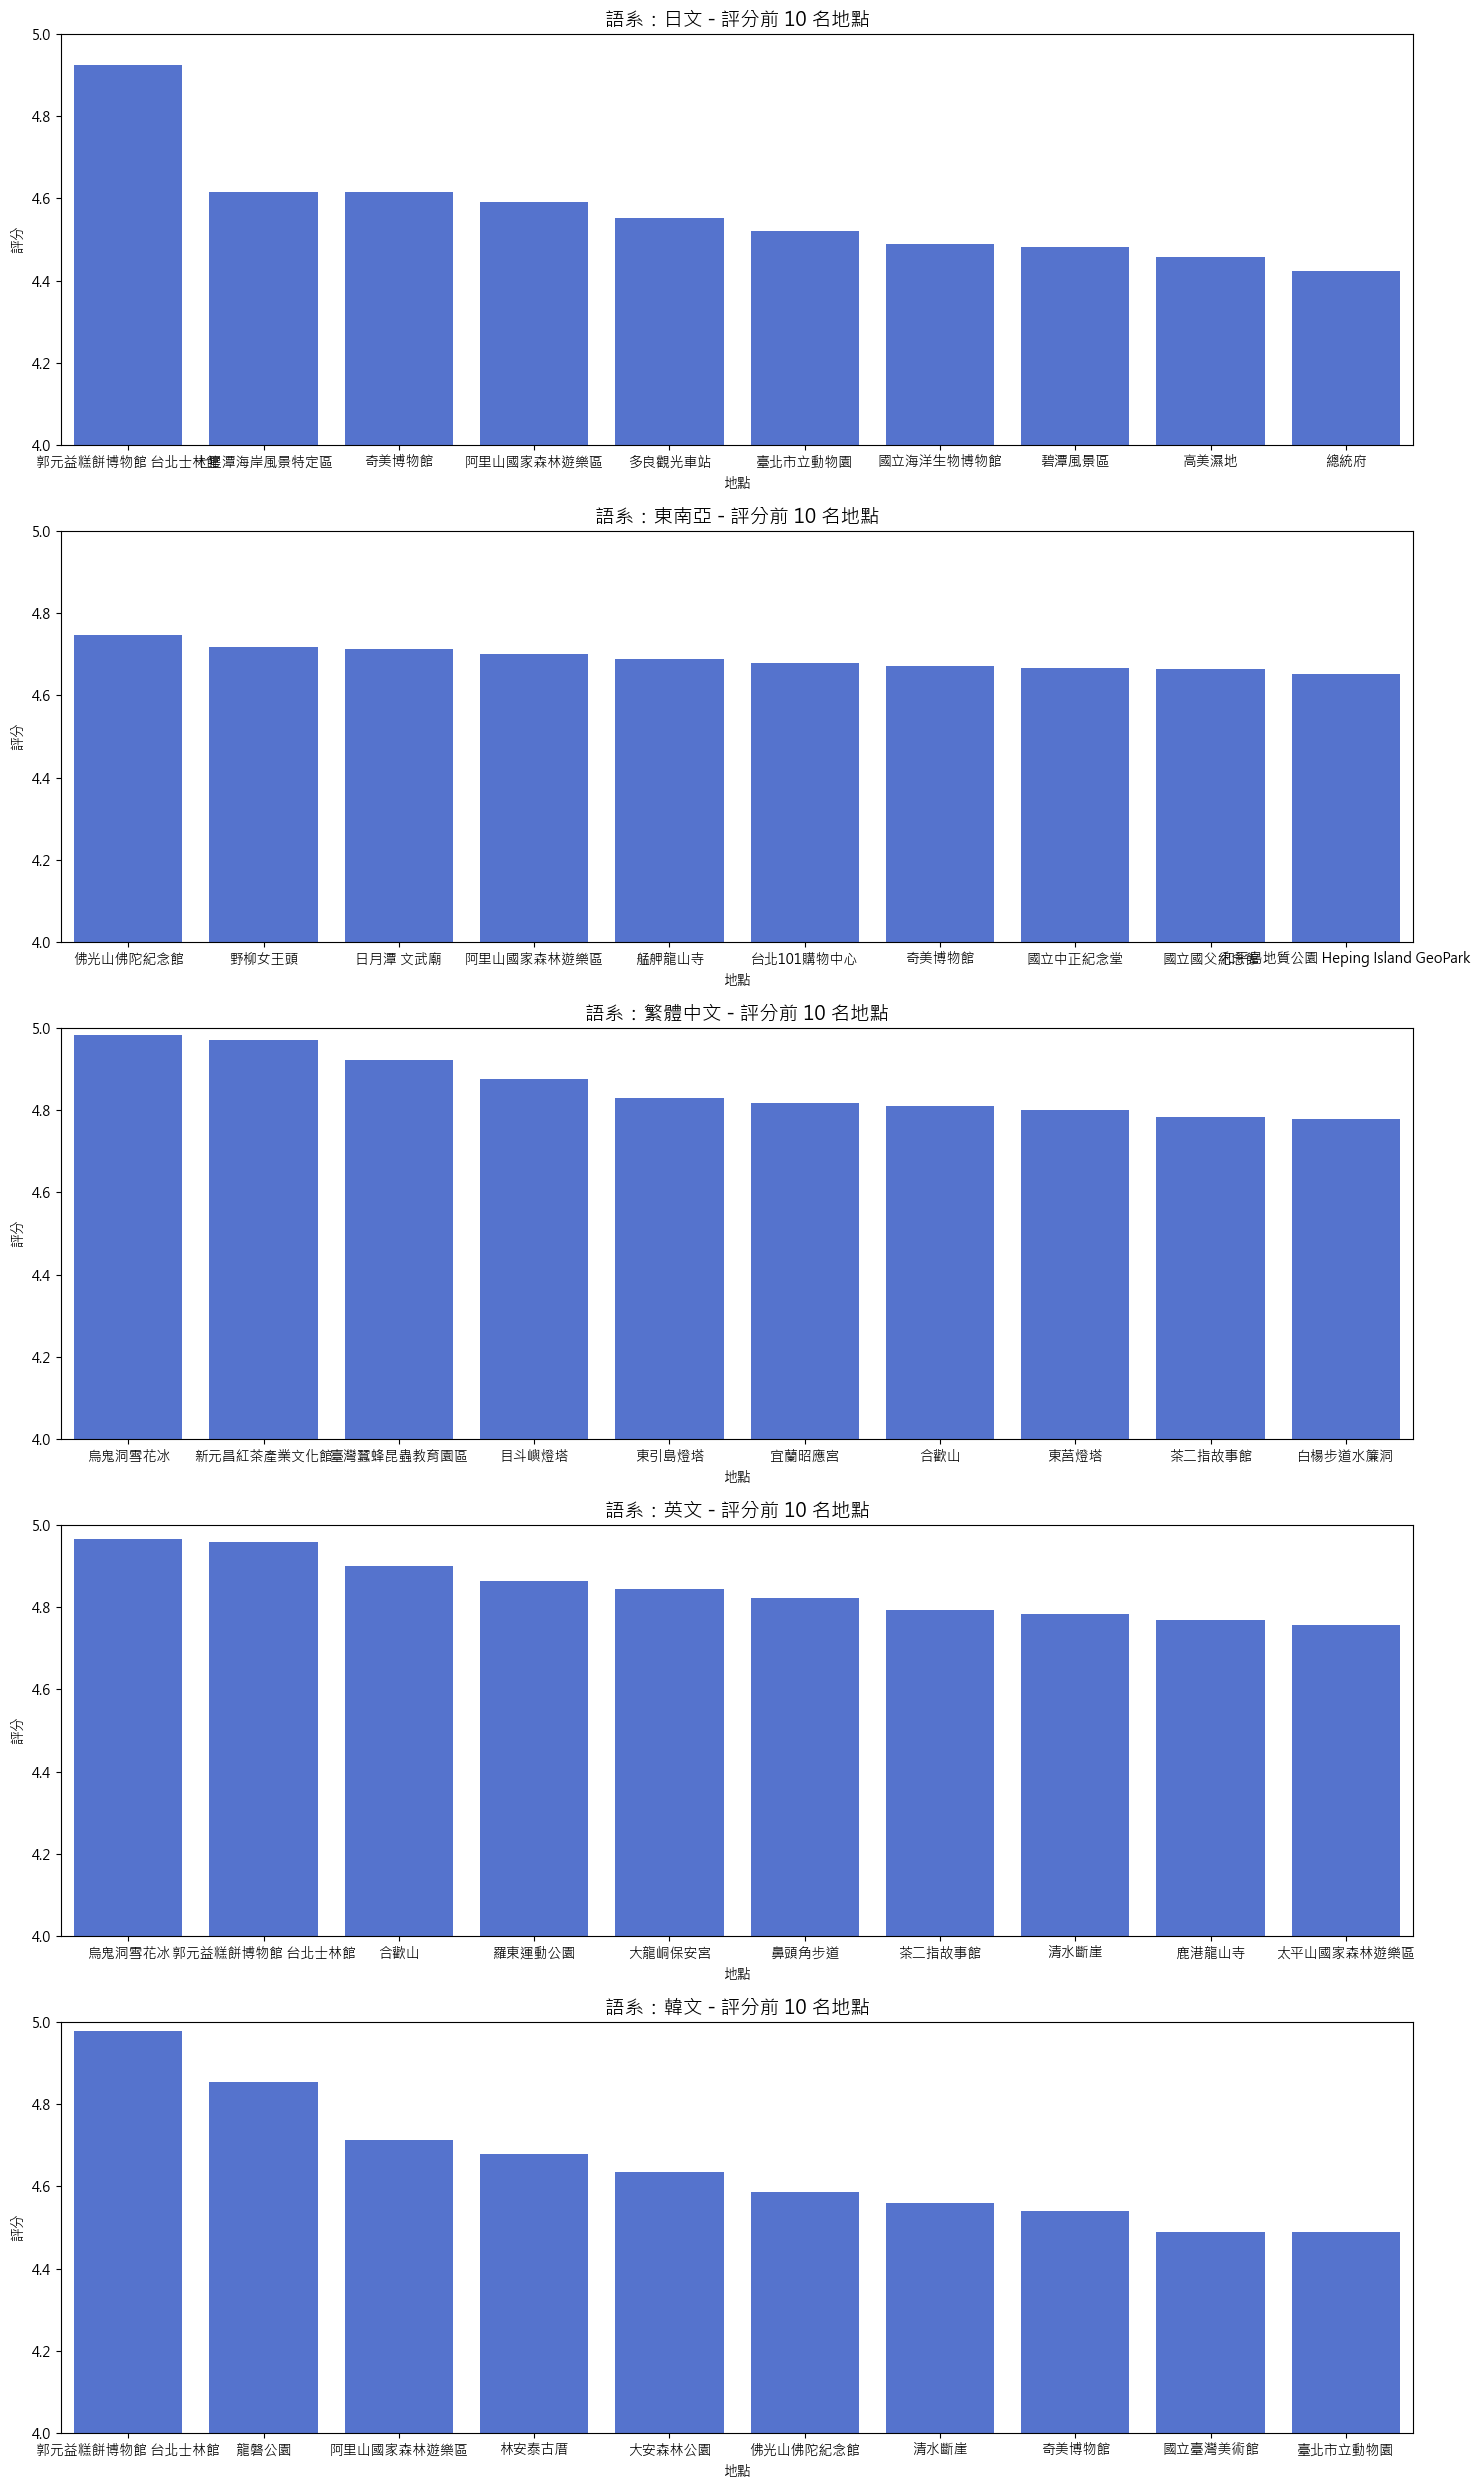

In [41]:
# 取得所有語系
languages = nationality_location_ratings.columns

# 設定子圖的行數與列數 (您可以根據語系數量調整)
num_languages = len(languages)
fig, axes = plt.subplots(nrows=num_languages, ncols=1, figsize=(15, 5 * num_languages))

# 繪製每個語系的圖
for ax, language in zip(axes, languages):
    # 取得該語系的評論數量並排序
    top_10_locations = nationality_location_ratings[language].nlargest(10)

    # 繪製長條圖
    sns.barplot(
        x=top_10_locations.index,
        y=top_10_locations.values,
        ax=ax,
        color="royalblue"
    )

    # 設定子圖樣式
    ax.set_title(f"語系：{language} - 評分前 10 名地點", fontsize=14)
    ax.set_xlabel("地點")
    ax.set_ylabel("評分")
    ax.tick_params(axis='x', rotation=0)
    ax.set_ylim(4, 5)

plt.tight_layout()
plt.show()

### 找出各語系評分前n名的地點交集

language        日文       東南亞      繁體中文        英文        韓文 average_rating
奇美博物館     4.614786  4.670984  4.732291  4.753107  4.539267       4.662087


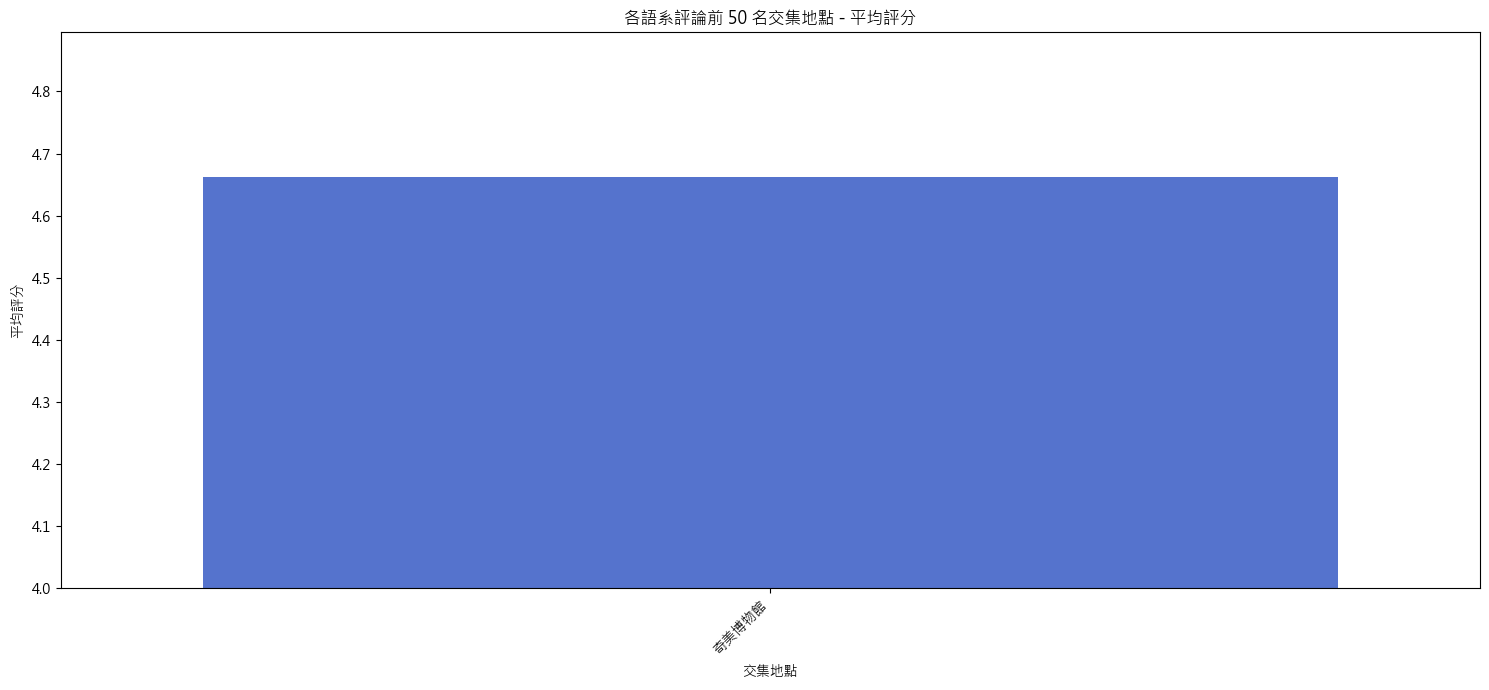

In [42]:
# 儲存每個語系的前 n 名地點
n = 50

# 取得所有語系
languages = nationality_location_ratings.columns

top_locations_ratings = {}
for language in languages:
    top_locations_ratings[language] = nationality_location_ratings[language].nlargest(n).index.tolist()

# 找出交集地點
intersected_locations_rating = set(top_locations_ratings[languages[0]])
for language in languages[1:]:
    intersected_locations_rating = intersected_locations_rating.intersection(set(top_locations_ratings[language]))

# 將交集地點轉換為列表
intersected_locations_list_rating = list(intersected_locations_rating)

# 計算交集地點的平均評分
intersected_data_rating = pd.DataFrame(index=intersected_locations_list_rating, columns=languages)
for location in intersected_locations_list_rating:
    for language in languages:
        intersected_data_rating.loc[location, language] = nationality_location_ratings.loc[location, language]

# 計算平均評分
intersected_data_rating['average_rating'] = intersected_data_rating.mean(axis=1)

# 繪製長條圖
plt.figure(figsize=(15, 7))
sns.barplot(
    x=intersected_data_rating['average_rating'].sort_values(ascending=False).index,
    y=intersected_data_rating['average_rating'].sort_values(ascending=False),
    color="royalblue"
)

instersected_data_with_taiwan_rating = intersected_data_rating.sort_values('average_rating',ascending=False)
print(instersected_data_with_taiwan_rating)

# 設定圖表樣式
plt.title(f"各語系評論前 {n} 名交集地點 - 平均評分")
plt.xlabel("交集地點")
plt.ylabel("平均評分")
plt.xticks(rotation=45,ha='right')
plt.ylim(4)
plt.tight_layout()
plt.show()

language          日文       東南亞        英文        韓文 average_rating
阿里山國家森林遊樂區  4.592308  4.700375  4.652788  4.714286       4.664939
奇美博物館       4.614786  4.670984  4.753107  4.539267       4.644536
佛光山佛陀紀念館    4.396947  4.747423  4.751611  4.586402       4.620596
大安森林公園      4.416667  4.564767   4.68841  4.634518        4.57609
臺北市立動物園     4.519737  4.537705  4.617045  4.488136       4.540656
國立中正紀念堂     4.337693  4.668096  4.680837  4.375608       4.515559
艋舺龍山寺       4.346792  4.688923  4.629436   4.24282       4.476993
臺中國家歌劇院     4.404651  4.596026  4.644162   4.14554       4.447595


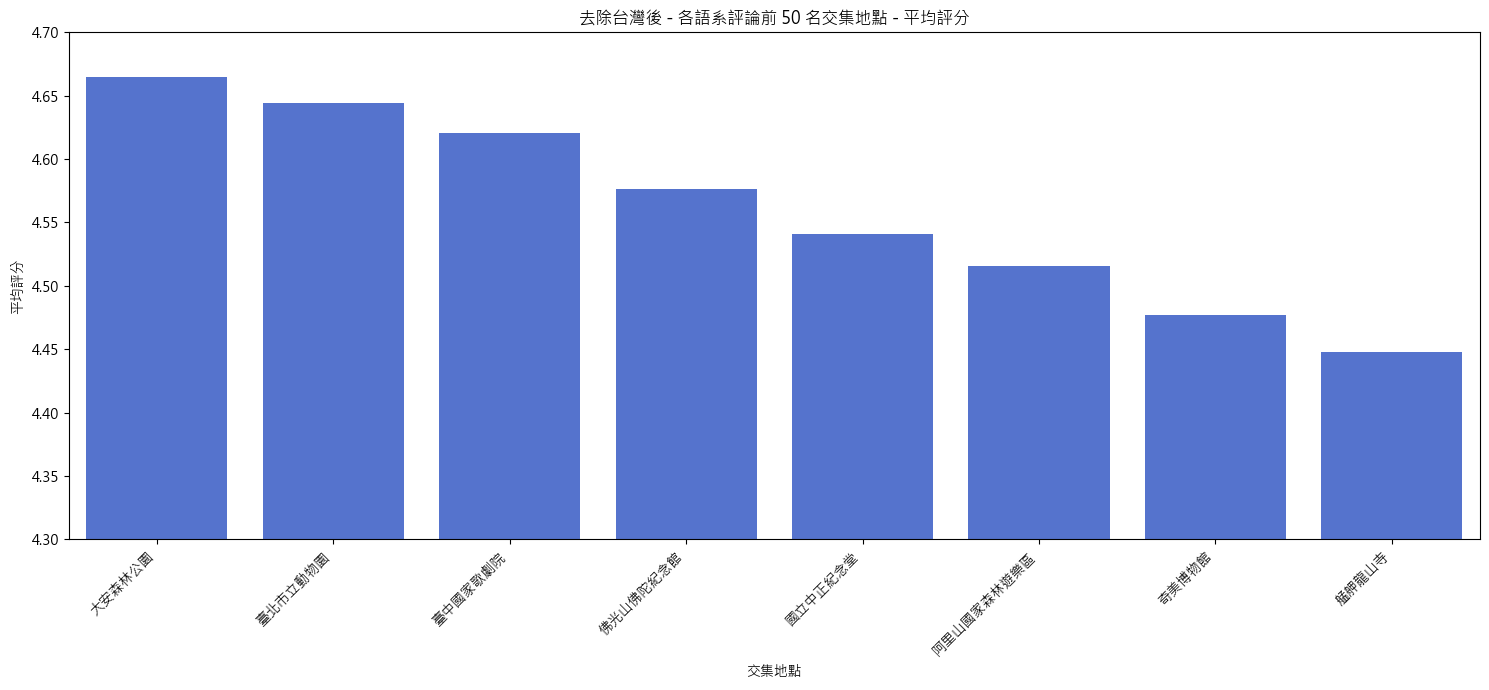

In [43]:
# 去除繁體中文之後的各語系前n評論點交集
nationality_location_ratings_no_taiwan = nationality_location_ratings.drop(columns="繁體中文")

# 取得所有語系
languages = nationality_location_ratings_no_taiwan.columns

# rating系的前 n 名地點
top_n_locations_ratings_no_taiwan = {}
for language in languages:
    top_n_locations_ratings_no_taiwan[language] = nationality_location_ratings_no_taiwan[language].nlargest(n).index.tolist()

# rating點
intersected_locations_no_taiwan_rating = set(top_n_locations_ratings_no_taiwan[languages[0]])
for language in languages[1:]:
    intersected_locations_no_taiwan_rating = intersected_locations_no_taiwan_rating.intersection(set(top_n_locations_ratings_no_taiwan[language]))

# 將交集地點轉換為列表
intersected_locations_list_no_taiwan_rating = list(intersected_locations_no_taiwan_rating)

# 計算交集地點的平均評論數量
intersected_data_rating = pd.DataFrame(index=intersected_locations_list_no_taiwan_rating, columns=languages)
for location in intersected_locations_list_no_taiwan_rating:
    for language in languages:
        intersected_data_rating.loc[location, language] = nationality_location_ratings_no_taiwan.loc[location, language]

# rating論數量
intersected_data_rating['average_rating'] = intersected_data_rating.mean(axis=1)

# 繪製長條圖
plt.figure(figsize=(15, 7))
sns.barplot(
    x=intersected_data_rating.index,
    y=intersected_data_rating['average_rating'].sort_values(ascending=False),
    color="royalblue"
)

instersected_data_no_taiwan_rating = intersected_data_rating.sort_values('average_rating',ascending=False)
print(instersected_data_no_taiwan_rating)

# 設定圖表樣式
plt.title(f"去除台灣後 - 各語系評論前 {n} 名交集地點 - 平均評分")
plt.xlabel("交集地點")
plt.ylabel("平均評分")
plt.xticks(rotation=45, ha='right')
plt.ylim(4.3, 4.7)
plt.tight_layout()
plt.show()

### 與繁體中文不同評分前n名的景點交集

In [44]:
# 找出有在各語系前n名交集中 但沒有在繁體中文前n名的景點
for i in range(50, 101, 50):
    # 儲存每個語系的前 n 名地點
    n = i

    # 取得所有語系
    languages = nationality_location_ratings.columns

    top_locations_ratings = {}
    for language in languages:
        top_locations_ratings[language] = nationality_location_ratings[language].nlargest(n).index.tolist()

    # 找出交集地點
    intersected_locations = set(top_locations_ratings[languages[0]])
    for language in languages[1:]:
        intersected_locations = intersected_locations.intersection(set(top_locations_ratings[language]))

    # 將交集地點轉換為列表
    intersected_locations_list = list(intersected_locations)

    # 取得所有語系
    languages = nationality_location_ratings_no_taiwan.columns

    # 儲存每個語系的前 n 名地點
    top_n_locations_ratings_no_taiwan = {}
    for language in languages:
        top_n_locations_ratings_no_taiwan[language] = nationality_location_ratings_no_taiwan[language].nlargest(n).index.tolist()

    # 找出交集地點
    intersected_locations = set(top_n_locations_ratings_no_taiwan[languages[0]])
    for language in languages[1:]:
        intersected_locations = intersected_locations.intersection(set(top_n_locations_ratings_no_taiwan[language]))

    # 將交集地點轉換為列表
    intersected_locations_list_no_taiwan = list(intersected_locations)

    top_n_locations_no_taiwan_list = list(set(intersected_locations_list_no_taiwan).difference(set(intersected_locations_list)))
    top_n_locations_no_taiwan = nationality_location_ratings_no_taiwan.loc[top_n_locations_no_taiwan_list]
    print(f"外國語系評分前{i}名交集但不在繁體中文評分前{i}名的景點")
    print(top_n_locations_no_taiwan)
    print('='*100)

外國語系評分前50名交集但不在繁體中文評分前50名的景點
language             日文       東南亞        英文        韓文
gmap_location                                        
大安森林公園         4.416667  4.564767  4.688410  4.634518
臺中國家歌劇院        4.404651  4.596026  4.644162  4.145540
佛光山佛陀紀念館       4.396947  4.747423  4.751611  4.586402
國立中正紀念堂        4.337693  4.668096  4.680837  4.375608
阿里山國家森林遊樂區     4.592308  4.700375  4.652788  4.714286
臺北市立動物園        4.519737  4.537705  4.617045  4.488136
艋舺龍山寺          4.346792  4.688923  4.629436  4.242820
外國語系評分前100名交集但不在繁體中文評分前100名的景點
language             日文       東南亞        英文        韓文
gmap_location                                        
二延平步道               NaN       NaN  4.630137       NaN
大安森林公園         4.416667  4.564767  4.688410  4.634518
臺北市立動物園        4.519737  4.537705  4.617045  4.488136
二二八和平公園        4.210863  4.444444  4.506306  4.279743
921地震教育園區           NaN       NaN  4.616959       NaN
臺中國家歌劇院        4.404651  4.596026  4.644162  4.145540
佛光山佛陀紀念館       4.39694

## 輸出

In [ ]:
# # 輸出成xlsx檔
# dfs = {
#     "語系評論數":nationality_counts,
#     "語系平均評分": nationality_groups,
#     "語系平均情感分數": nlp_nationality_groups,
#     "語系評分與情感分數並列": nationality_groups_all,
#     "語系縣市平均評分": top_city_per_nation,
#     "語系縣市平均情感分數": nlp_top_city_per_nation,
#     "各語系各縣市平均分數與情感分數並列": top_city_per_nation_all,
#     "語系類別平均評分": top_type_per_nation,
#     "語系類別平均情感分數": nlp_top_type_per_nation,
#     "依類別並列評分與情感分數": top_type_per_nation_merged,
#     "各語系各縣市景點評論數量": city_counts,
#     "各語系各縣市景點評論數量(標準化)": city_counts_standardized,
#     "各語系各類別景點評論數量": city_groups,
#     "各語系各類別景點評論數量(標準化)": city_groups_standardized,
#     "各語系各景點評分數量": nationality_location_counts,
#     "各語系評論數前25名的地點交集": instersected_data_with_taiwan,
#     "去除台灣之後的各語系前25評論點交集": instersected_data_no_taiwan,
#     "各語系各景點評分(評論數>100)": nationality_location_ratings,
#     "各語系評分前50名地點交集(評論數>100)": instersected_data_with_taiwan_rating,
#     "去除台灣後的各語系評分前50名地點交集(評論數>100)":instersected_data_no_taiwan_rating,
# }

# # 輸出成 Excel，並存到不同的 Sheet
# with pd.ExcelWriter("../data/descriptive_statistic_analysis_by_language.xlsx") as writer:
#     for sheet_name, df in dfs.items():
#         df.to_excel(writer, sheet_name=sheet_name)

# print("已儲存！")

已儲存！
